# Zillow EDA:  Opportunities for Feature Engineering

This EDA is mostly focused on searching for opportunties for feature engineering. Some pieces of code were copied and/or inspired by the other great EDAs:
- https://www.kaggle.com/philippsp/exploratory-analysis-zillow
- https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-zillow-prize
- https://www.kaggle.com/captcalculator/a-very-extensive-zillow-exploratory-analysis

In [1]:
import pandas            as pd;
import numpy             as np;
import seaborn           as sns;
import matplotlib.pyplot as plt;

%matplotlib inline

Import CSV files and rename for clarity.

In [2]:
names = ['parcelid', 'air_conditioning_type', 'architectural_style', 
         'area_basement', 'num_bathroom', 'num_bedroom', 'framing_type',
         'building_quality', 'num_bathroom_calc', 'deck_type',
         'area_firstfloor_finished', 'area_total_calc',
         'area_living_finished', 'perimeter_living',
         'area_total', 'area_firstfloor_unfinished',
         'area_base', 'fips', 'num_fireplace', 'num_fullbath',
         'num_garagecar', 'area_garage', 'hashottuborspa',
         'heating_type', 'latitude', 'longitude',
         'area_lot', 'num_pool', 'area_pools', 'pooltypeid10',
         'pooltypeid2', 'pooltypeid7', 'property_land_use_code',
         'property_land_use_type', 'property_zoning_desc',
         'census_raw_tract_block', 'region_city', 'region_county',
         'region_neighborhood', 'region_zipcode', 'num_room', 'story_type',
         'num_34_bath', 'material_type', 'num_unit',
         'area_patio', 'area_shed', 'build_year',
         'num_stories', 'flag_fireplace', 'tax_assessed_structure_value',
         'tax_assessed_parcel_value', 'tax_assessment_year', 'tax_assessed_land_alue',
         'tax_property', 'tax_delinquency_flag', 'tax_delinquency_year',
         'census_tract_block']

train_df   = pd.read_csv('train_2016.csv', parse_dates=["transactiondate"]);
prop_df    = pd.read_csv('properties_2016.csv', names=names, header=0);
sample_df  = pd.read_csv('sample_submission.csv')

# Convert property float.64 data to float.32 to save memory
for c, dtype in zip(prop_df.columns, prop_df.dtypes):
    if dtype == np.float64:
        prop_df[c] = prop_df[c].astype(np.float32)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Inspect what the datasets look like. The training set is only about 3% the size of the test set!

In [3]:
#print(train_df.values.shape)
train_df.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


In [4]:
#print(prop_df.values.shape) # looking at large shapes seems to break Kaggle Kernel's memory constraints
prop_df.head()

,parcelid,air_conditioning_type,architectural_style,area_basement,num_bathroom,num_bedroom,framing_type,building_quality,num_bathroom_calc,deck_type,...,num_stories,flag_fireplace,tax_assessed_structure_value,tax_assessed_parcel_value,tax_assessment_year,tax_assessed_land_alue,tax_property,tax_delinquency_flag,tax_delinquency_year,census_tract_block
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.369141,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.570312,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.169922,NaN,NaN,NaN


In [5]:
#print(sample_df.values.shape)
sample_df.head()

,ParcelId,201610,201611,201612,201710,201711,201712
0,10754147,0,0,0,0,0,0
1,10759547,0,0,0,0,0,0
2,10843547,0,0,0,0,0,0
3,10859147,0,0,0,0,0,0
4,10879947,0,0,0,0,0,0


Merge the train and test datasets with the "properties" dataset.

In [6]:
train_df = pd.merge(train_df, prop_df, on='parcelid', how='left')
#print(train_df.values.shape)
train_df.head()

,parcelid,logerror,transactiondate,air_conditioning_type,architectural_style,area_basement,num_bathroom,num_bedroom,framing_type,building_quality,...,num_stories,flag_fireplace,tax_assessed_structure_value,tax_assessed_parcel_value,tax_assessment_year,tax_assessed_land_alue,tax_property,tax_delinquency_flag,tax_delinquency_year,census_tract_block
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.879883,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.019531,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.480469,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.739990,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.959961,NaN,NaN,6.059042e+13


In [7]:
sample_df['parcelid'] = sample_df['ParcelId'];
sample_df = sample_df.drop(['ParcelId', '201610', '201611', '201612', '201710', '201711', '201712'], axis=1)
sample_df = pd.merge(sample_df, prop_df, on='parcelid', how='left')
#print(sample_df.values.shape)
sample_df.head()

,parcelid,air_conditioning_type,architectural_style,area_basement,num_bathroom,num_bedroom,framing_type,building_quality,num_bathroom_calc,deck_type,...,num_stories,flag_fireplace,tax_assessed_structure_value,tax_assessed_parcel_value,tax_assessment_year,tax_assessed_land_alue,tax_property,tax_delinquency_flag,tax_delinquency_year,census_tract_block
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.369141,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.570312,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.169922,NaN,NaN,NaN


Create an abs(logerror) column to inspect later.

In [8]:
train_df['abs_logerror'] = abs(train_df['logerror'].values)

# Time Dependence

Are there seasonal patterns to the number of transactions?

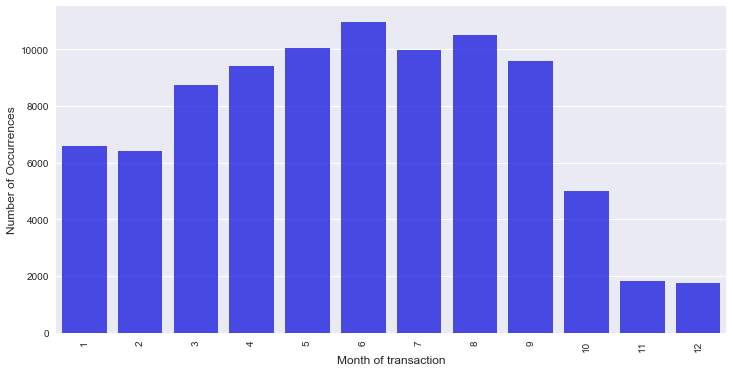

In [9]:
train_df['transaction_month'] = train_df['transactiondate'].dt.month

cnt_srs = train_df['transaction_month'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='blue')
plt.xticks(rotation='vertical')
plt.xlabel('Month of transaction', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

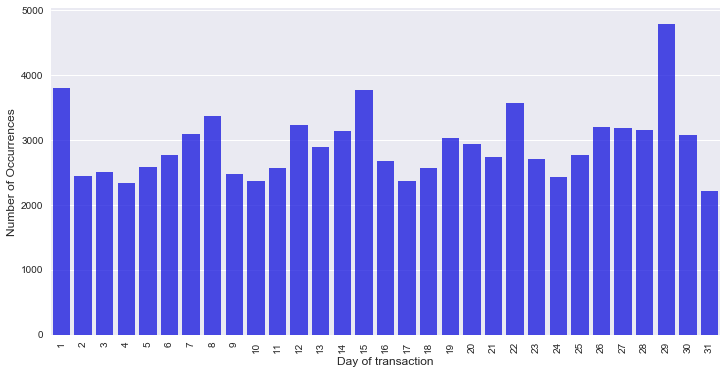

In [10]:
train_df['transaction_day'] = train_df['transactiondate'].dt.day

cnt_srs = train_df['transaction_day'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='blue')
plt.xticks(rotation='vertical')
plt.xlabel('Day of transaction', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

Check how many parcel values occur 1x, 2x, 3x times

In [11]:
train_df['parcelid'].value_counts().reset_index()['parcelid'].value_counts()

1    90554
2      127
3        1
Name: parcelid, dtype: int64

How many missing values are there in the training data? Some features have almost all their entries missing. May want to remove these features.

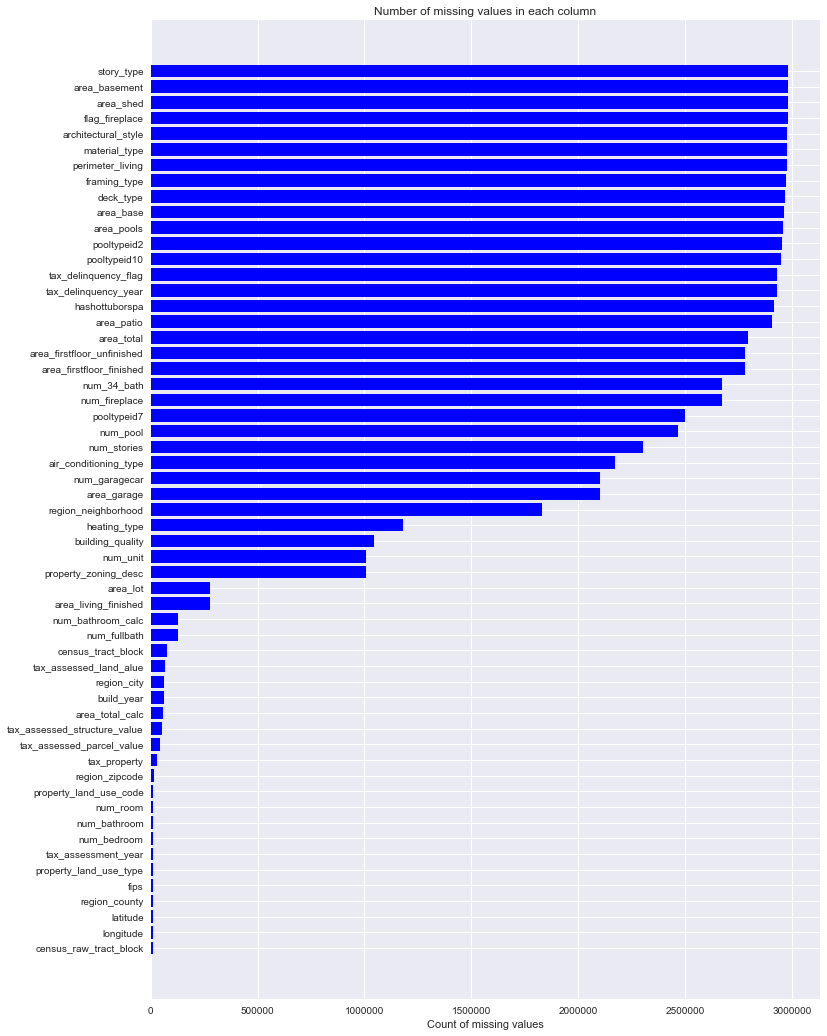

In [12]:
missing_df = prop_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.ix[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')

ind = np.arange(missing_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, missing_df.missing_count.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

# Inspect Property Descriptions

How is logerror and abs(logerror) distributed. The distributions are almost normal.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



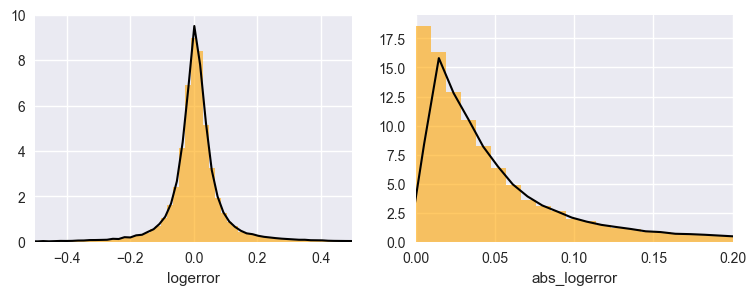

In [72]:
fig  = plt.figure(figsize=(9, 3), dpi=100);

axes1 = fig.add_subplot(121); 
axes2 = fig.add_subplot(122); 

sns.distplot(train_df['logerror'],     bins=500, ax=axes1, axlabel='logerror',     kde_kws={"color": "k", "lw": 1.5, "gridsize":500}, hist_kws={"linewidth": 3, "alpha": 0.6, "color": "orange"});
sns.distplot(train_df['abs_logerror'], bins=500, ax=axes2, axlabel='abs_logerror', kde_kws={"color": "k", "lw": 1.5, "gridsize":500}, hist_kws={"linewidth": 3, "alpha": 0.6, "color": "orange"});

axes1.set_xlim(-0.5, 0.5);
axes2.set_xlim( 0.0, 0.2);

What features have the strongest correlation with logerror and abs(logerror)?

In [83]:
print('Correlation with Log Error')
print(train_df.corr(method='pearson').drop(['logerror', 'abs_logerror']).sort_values('logerror', ascending=False)['logerror'].head(10))
print('\n')
print('Correlation with Abs Log Error')
print(train_df.corr(method='pearson').drop(['logerror', 'abs_logerror']).sort_values('abs_logerror', ascending=False)['abs_logerror'].head(10))

Correlation with Log Error
area_basement           0.253395
area_shed               0.086179
area_living_finished    0.041922
area_total_calc         0.038784
area_base               0.036847
perimeter_living        0.034715
num_34_bath             0.034069
num_fireplace           0.033235
num_bathroom_calc       0.029448
num_fullbath            0.028845
Name: logerror, dtype: float64


Correlation with Abs Log Error
area_basement       0.212579
perimeter_living    0.129071
area_pools          0.109684
num_34_bath         0.064325
region_county       0.061964
building_quality    0.059824
tax_property        0.048277
num_unit            0.046517
area_total          0.045420
heating_type        0.040220
Name: abs_logerror, dtype: float64


Plot partial depedence plots of the most strongly-correlated variables

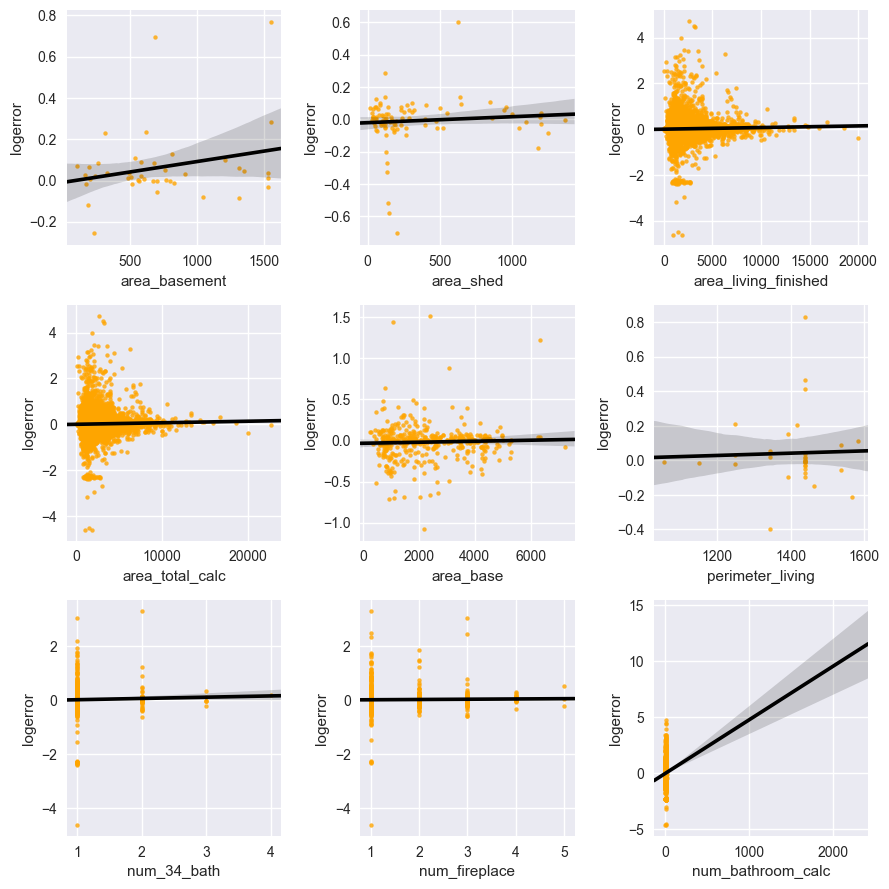

In [27]:
fig  = plt.figure(figsize=(9, 9), dpi=100);

#fig.suptitle('House Characteristics')

axes1 = fig.add_subplot(331); axes2 = fig.add_subplot(332); axes3 = fig.add_subplot(333); 
axes4 = fig.add_subplot(334); axes5 = fig.add_subplot(335); axes6 = fig.add_subplot(336); 
axes7 = fig.add_subplot(337); axes8 = fig.add_subplot(338); axes9 = fig.add_subplot(339); 

sns.regplot(x='area_basement',        y='logerror', data=train_df, ax=axes1, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='area_shed',            y='logerror', data=train_df, ax=axes2, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='area_living_finished', y='logerror', data=train_df, ax=axes3, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='area_total_calc',      y='logerror', data=train_df, ax=axes4, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='area_base',            y='logerror', data=train_df, ax=axes5, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='perimeter_living',     y='logerror', data=train_df, ax=axes6, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='num_34_bath',          y='logerror', data=train_df, ax=axes7, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='num_fireplace',        y='logerror', data=train_df, ax=axes8, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='num_bathroom_calc',    y='logerror', data=train_df, ax=axes9, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});

fig.tight_layout();

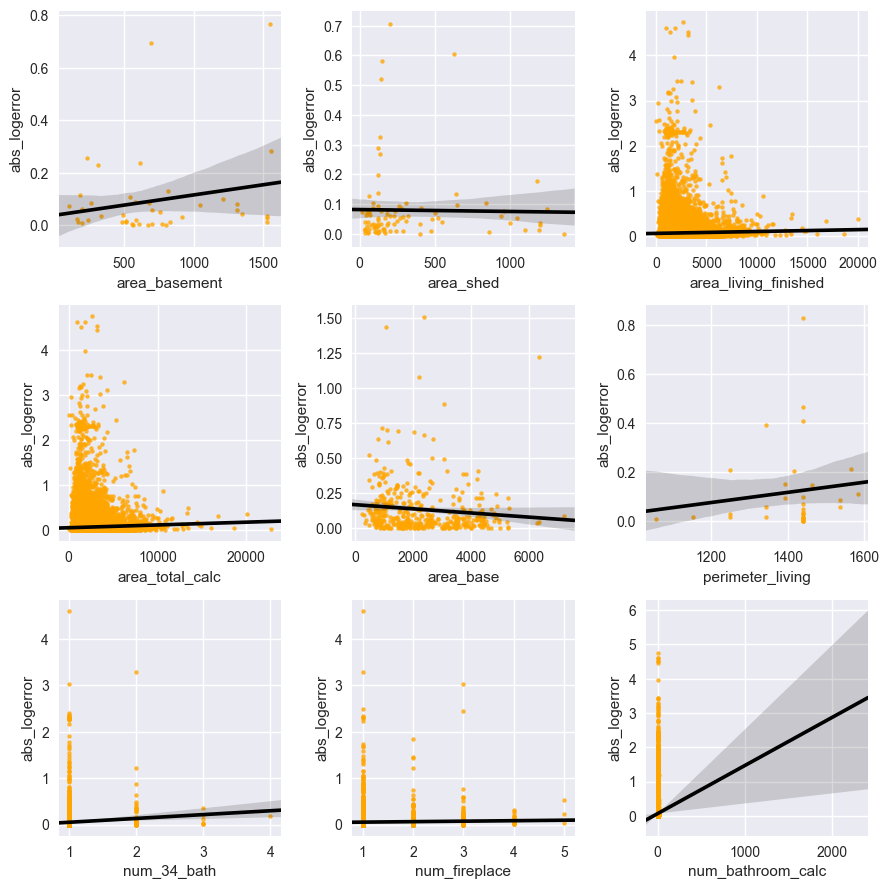

In [84]:
fig  = plt.figure(figsize=(9, 9), dpi=100);

#fig.suptitle('House Characteristics')

axes1 = fig.add_subplot(331); axes2 = fig.add_subplot(332); axes3 = fig.add_subplot(333); 
axes4 = fig.add_subplot(334); axes5 = fig.add_subplot(335); axes6 = fig.add_subplot(336); 
axes7 = fig.add_subplot(337); axes8 = fig.add_subplot(338); axes9 = fig.add_subplot(339); 

sns.regplot(x='area_basement',        y='abs_logerror', data=train_df, ax=axes1, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='area_shed',            y='abs_logerror', data=train_df, ax=axes2, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='area_living_finished', y='abs_logerror', data=train_df, ax=axes3, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='area_total_calc',      y='abs_logerror', data=train_df, ax=axes4, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='area_base',            y='abs_logerror', data=train_df, ax=axes5, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='perimeter_living',     y='abs_logerror', data=train_df, ax=axes6, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='num_34_bath',          y='abs_logerror', data=train_df, ax=axes7, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='num_fireplace',        y='abs_logerror', data=train_df, ax=axes8, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='num_bathroom_calc',    y='abs_logerror', data=train_df, ax=axes9, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});

fig.tight_layout();

Many of these strongly-correlated features have a lot of missing values, and may not be very reliable. Now look at which variables have the strongest correlations and have at least half their data points filled in. 

In [87]:
simple_train_df = train_df.copy()
simple_train_df = simple_train_df.drop(missing_df[missing_df['missing_count'] > 1500000]['column_name'].values, axis=1)

In [88]:
print('Correlation with Log Error')
print(simple_train_df.corr(method='pearson').drop(['logerror', 'abs_logerror']).sort_values('logerror', ascending=False)['logerror'].head(10))
print('\n')
print('Correlation with Abs Log Error')
print(simple_train_df.corr(method='pearson').drop(['logerror', 'abs_logerror']).sort_values('abs_logerror', ascending=False)['abs_logerror'].head(10))

Correlation with Log Error
area_living_finished            0.041922
area_total_calc                 0.038784
num_bathroom_calc               0.029448
num_fullbath                    0.028845
num_bathroom                    0.027889
num_bedroom                     0.025467
tax_assessed_structure_value    0.022085
build_year                      0.017312
census_tract_block              0.008892
census_raw_tract_block          0.008376
Name: logerror, dtype: float64


Correlation with Abs Log Error
region_county                   0.061964
building_quality                0.059824
tax_property                    0.048277
num_unit                        0.046517
heating_type                    0.040220
tax_assessed_land_alue          0.039973
area_total_calc                 0.039368
tax_assessed_parcel_value       0.038343
tax_assessed_structure_value    0.027121
area_living_finished            0.026750
Name: abs_logerror, dtype: float64


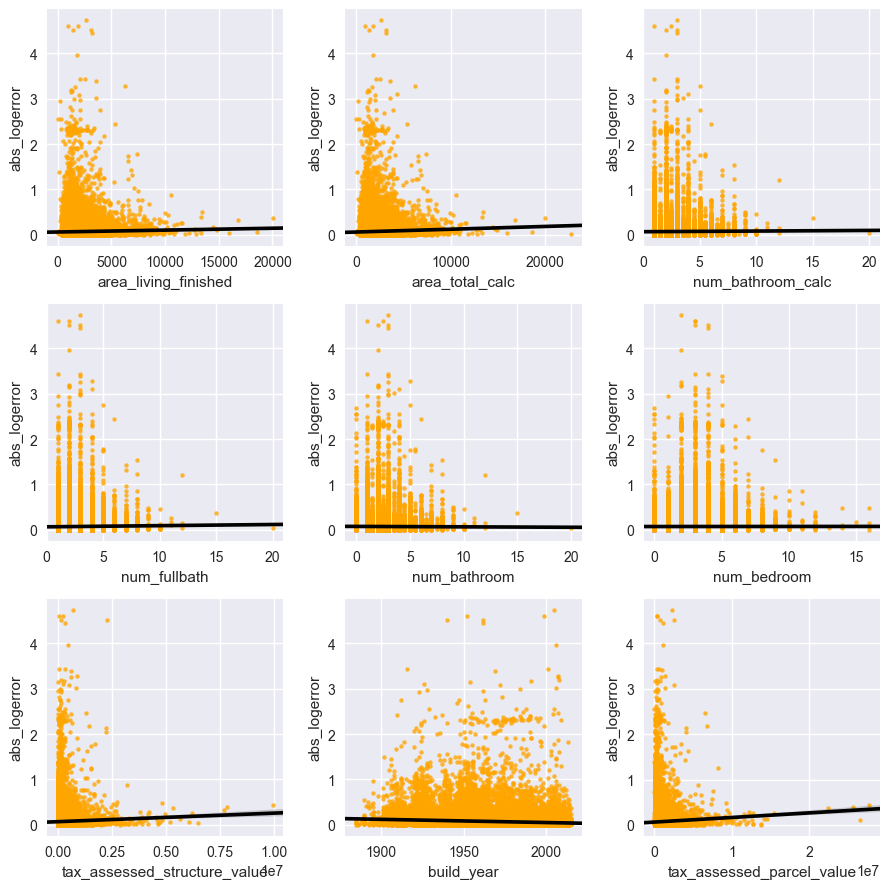

In [89]:
fig  = plt.figure(figsize=(9, 9), dpi=100);

#fig.suptitle('House Characteristics')

axes1 = fig.add_subplot(331); axes2 = fig.add_subplot(332); axes3 = fig.add_subplot(333); 
axes4 = fig.add_subplot(334); axes5 = fig.add_subplot(335); axes6 = fig.add_subplot(336); 
axes7 = fig.add_subplot(337); axes8 = fig.add_subplot(338); axes9 = fig.add_subplot(339); 

sns.regplot(x='area_living_finished',         y='abs_logerror', data=train_df, ax=axes1, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='area_total_calc',              y='abs_logerror', data=train_df, ax=axes2, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='num_bathroom_calc',            y='abs_logerror', data=train_df, ax=axes3, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='num_fullbath',                 y='abs_logerror', data=train_df, ax=axes4, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='num_bathroom',                 y='abs_logerror', data=train_df, ax=axes5, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='num_bedroom',                  y='abs_logerror', data=train_df, ax=axes6, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='tax_assessed_structure_value', y='abs_logerror', data=train_df, ax=axes7, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='build_year',                   y='abs_logerror', data=train_df, ax=axes8, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='tax_assessed_parcel_value',    y='abs_logerror', data=train_df, ax=axes9, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});

fig.tight_layout();

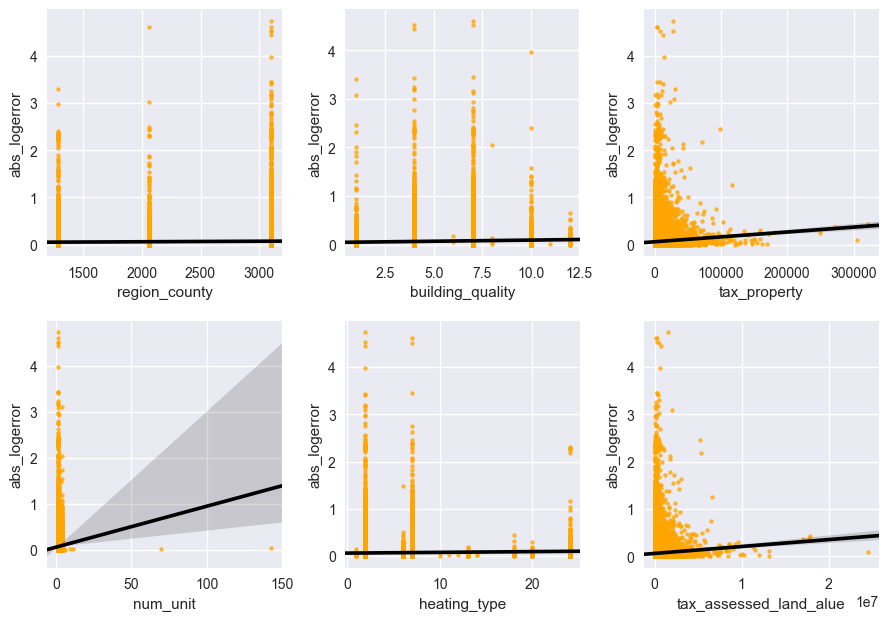

In [90]:
fig  = plt.figure(figsize=(9, 9), dpi=100);

#fig.suptitle('House Characteristics')

axes1 = fig.add_subplot(331); axes2 = fig.add_subplot(332); axes3 = fig.add_subplot(333); 
axes4 = fig.add_subplot(334); axes5 = fig.add_subplot(335); axes6 = fig.add_subplot(336); 

sns.regplot(x='region_county',          y='abs_logerror', data=train_df, ax=axes1, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='building_quality',       y='abs_logerror', data=train_df, ax=axes2, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='tax_property',           y='abs_logerror', data=train_df, ax=axes3, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='num_unit',               y='abs_logerror', data=train_df, ax=axes4, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='heating_type',           y='abs_logerror', data=train_df, ax=axes5, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='tax_assessed_land_alue', y='abs_logerror', data=train_df, ax=axes6, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});

fig.tight_layout();

Notice that many of these data points are very heteroskedastic. That is, the mean log error at low values is much larger than it is at large values. We may want to take advantage of this for feature engineering.

# Inspect Time Data

How does logerror and abs(logerror) vary with time?

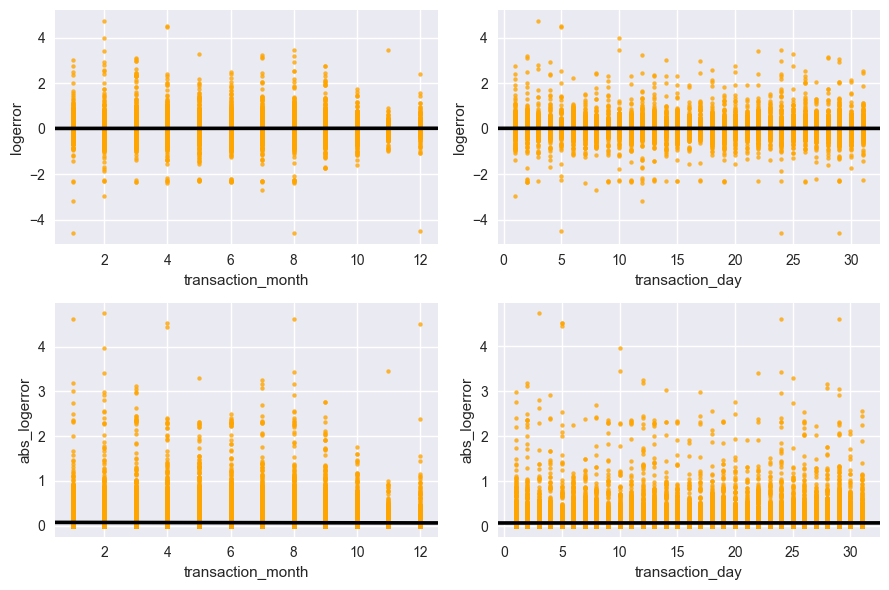

In [91]:
fig  = plt.figure(figsize=(9, 6), dpi=100);

axes1 = fig.add_subplot(221); axes2 = fig.add_subplot(222);
axes3 = fig.add_subplot(223); axes4 = fig.add_subplot(224);

sns.regplot(x='transaction_month', y='logerror',     data=train_df, ax=axes1, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='transaction_day',   y='logerror',     data=train_df, ax=axes2, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='transaction_month', y='abs_logerror', data=train_df, ax=axes3, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});
sns.regplot(x='transaction_day',   y='abs_logerror', data=train_df, ax=axes4, scatter_kws={"s": 10, "color":"orange"}, line_kws={"color":"black"});

fig.tight_layout();

# Inspect Categorical Data

Inspect (a lot) of categorical data.

TLDR:

- Many of the columns consist of features that naively look ordinal (e.g. integers 1-30) but aren't, and should be hot-encoded into a more suitable form.
- There are sometimes substantial differences between train and test distributions.

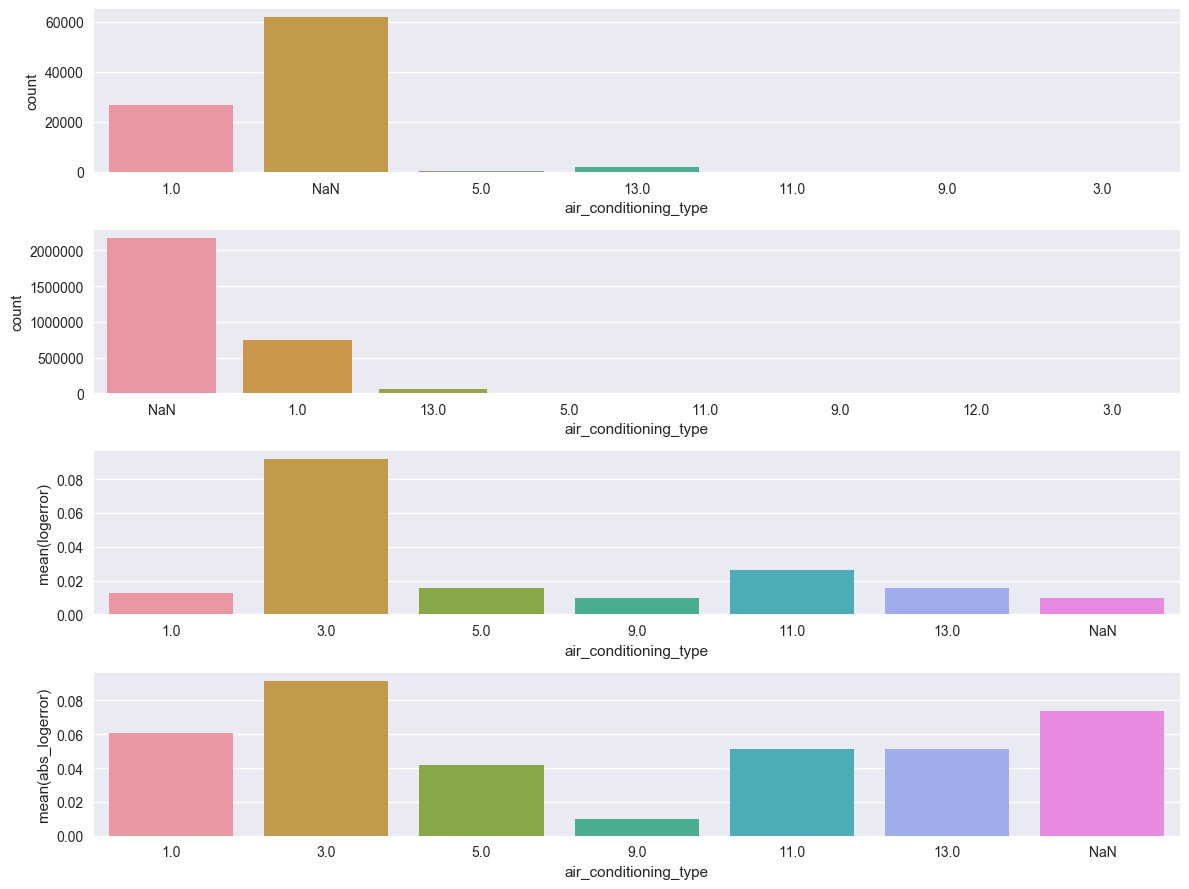

In [13]:
feature = 'air_conditioning_type'

fig  = plt.figure(figsize=(12, 9), dpi=100);
axes1 = fig.add_subplot(411); axes2 = fig.add_subplot(412); axes3 = fig.add_subplot(413); axes4 = fig.add_subplot(414); 
sns.countplot(train_df[feature].fillna('NaN'), ax=axes1); sns.countplot(sample_df[feature].fillna('NaN'),  ax=axes2);
bar_df1 = train_df[[feature,     "logerror"]].fillna('NaN').groupby([feature], as_index=False).mean()
bar_df2 = train_df[[feature, "abs_logerror"]].fillna('NaN').groupby([feature], as_index=False).mean()
sns.barplot(x=feature, y='logerror',     data=bar_df1, ax=axes3);
sns.barplot(x=feature, y='abs_logerror', data=bar_df2, ax=axes4);
fig.tight_layout()

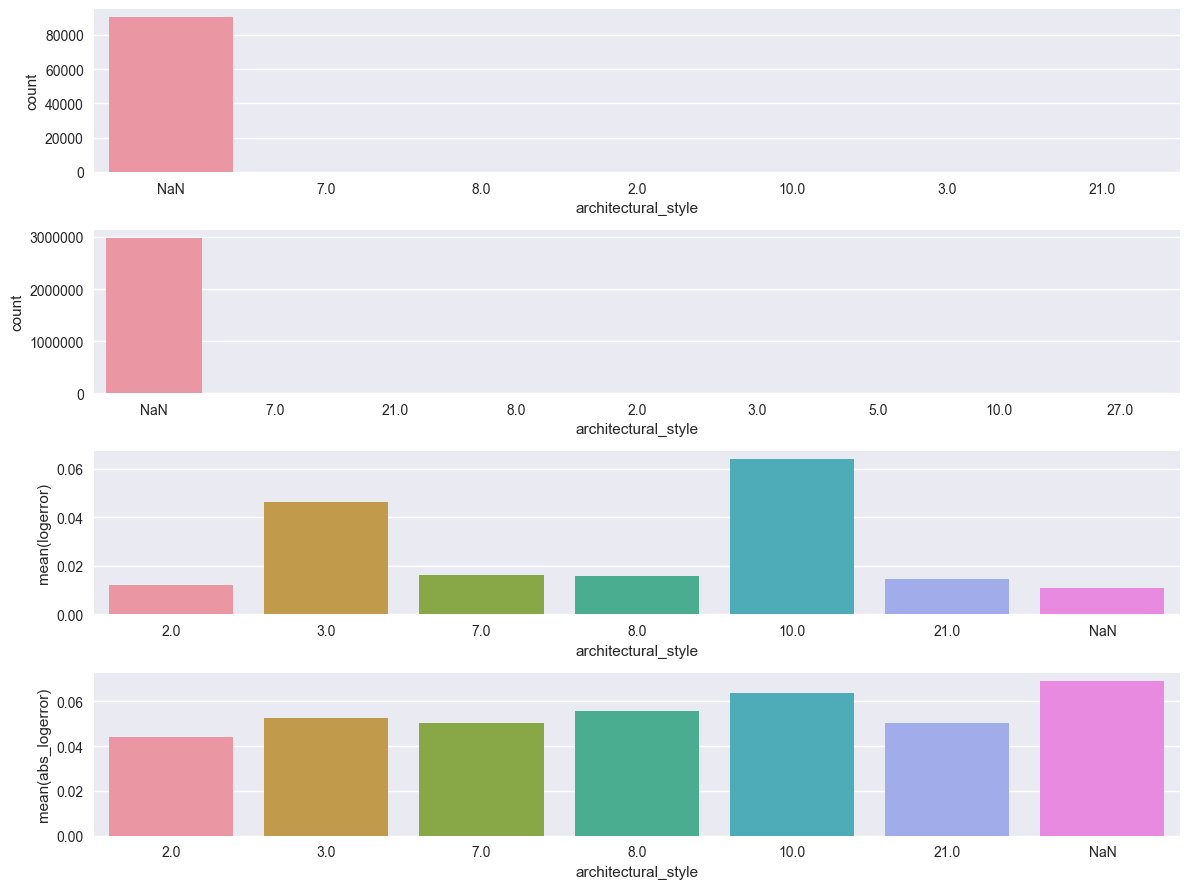

In [14]:
feature = 'architectural_style'

fig  = plt.figure(figsize=(12, 9), dpi=100);
axes1 = fig.add_subplot(411); axes2 = fig.add_subplot(412); axes3 = fig.add_subplot(413); axes4 = fig.add_subplot(414); 
sns.countplot(train_df[feature].fillna('NaN'), ax=axes1); sns.countplot(sample_df[feature].fillna('NaN'),  ax=axes2);
bar_df1 = train_df[[feature,     "logerror"]].fillna('NaN').groupby([feature], as_index=False).mean()
bar_df2 = train_df[[feature, "abs_logerror"]].fillna('NaN').groupby([feature], as_index=False).mean()
sns.barplot(x=feature, y='logerror',     data=bar_df1, ax=axes3);
sns.barplot(x=feature, y='abs_logerror', data=bar_df2, ax=axes4);
fig.tight_layout()

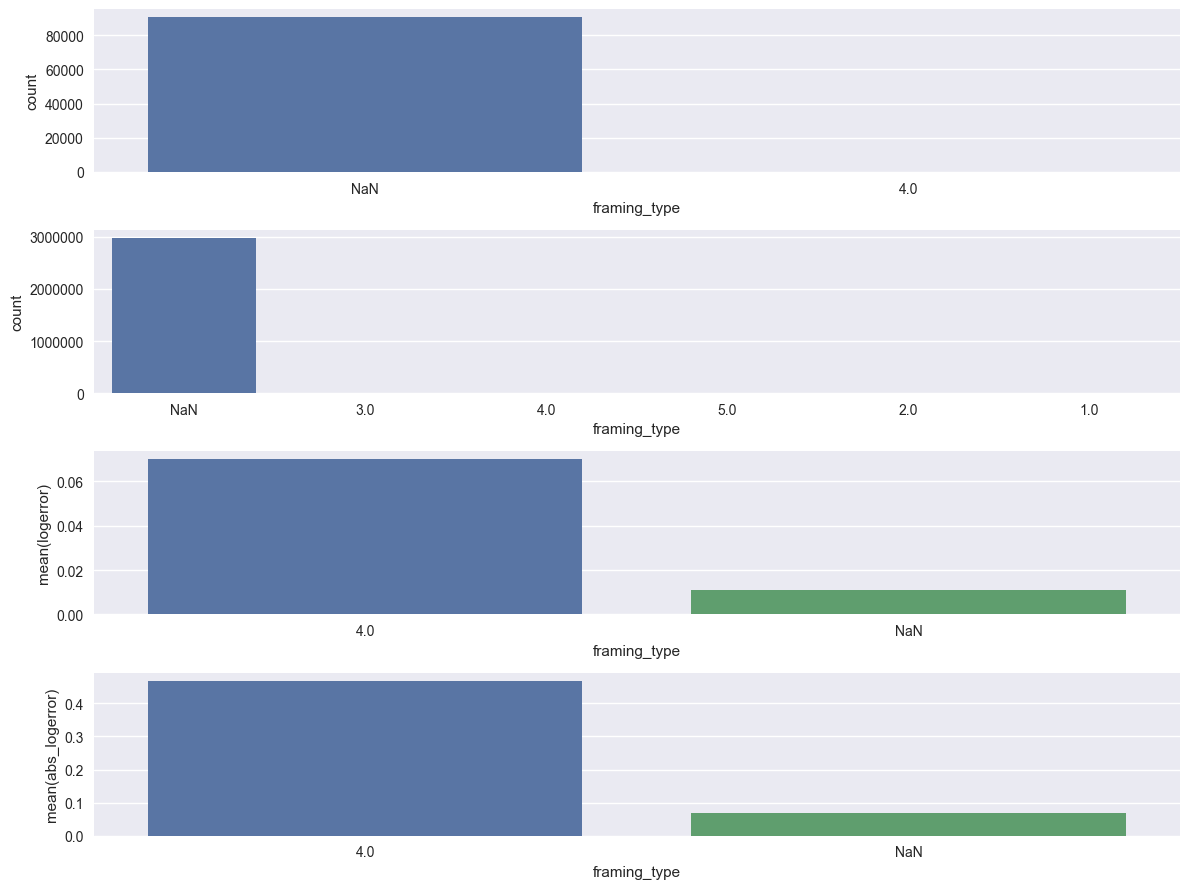

In [15]:
feature = 'framing_type'

fig  = plt.figure(figsize=(12, 9), dpi=100);
axes1 = fig.add_subplot(411); axes2 = fig.add_subplot(412); axes3 = fig.add_subplot(413); axes4 = fig.add_subplot(414); 
sns.countplot(train_df[feature].fillna('NaN'), ax=axes1); sns.countplot(sample_df[feature].fillna('NaN'),  ax=axes2);
bar_df1 = train_df[[feature,     "logerror"]].fillna('NaN').groupby([feature], as_index=False).mean()
bar_df2 = train_df[[feature, "abs_logerror"]].fillna('NaN').groupby([feature], as_index=False).mean()
sns.barplot(x=feature, y='logerror',     data=bar_df1, ax=axes3);
sns.barplot(x=feature, y='abs_logerror', data=bar_df2, ax=axes4);
fig.tight_layout()

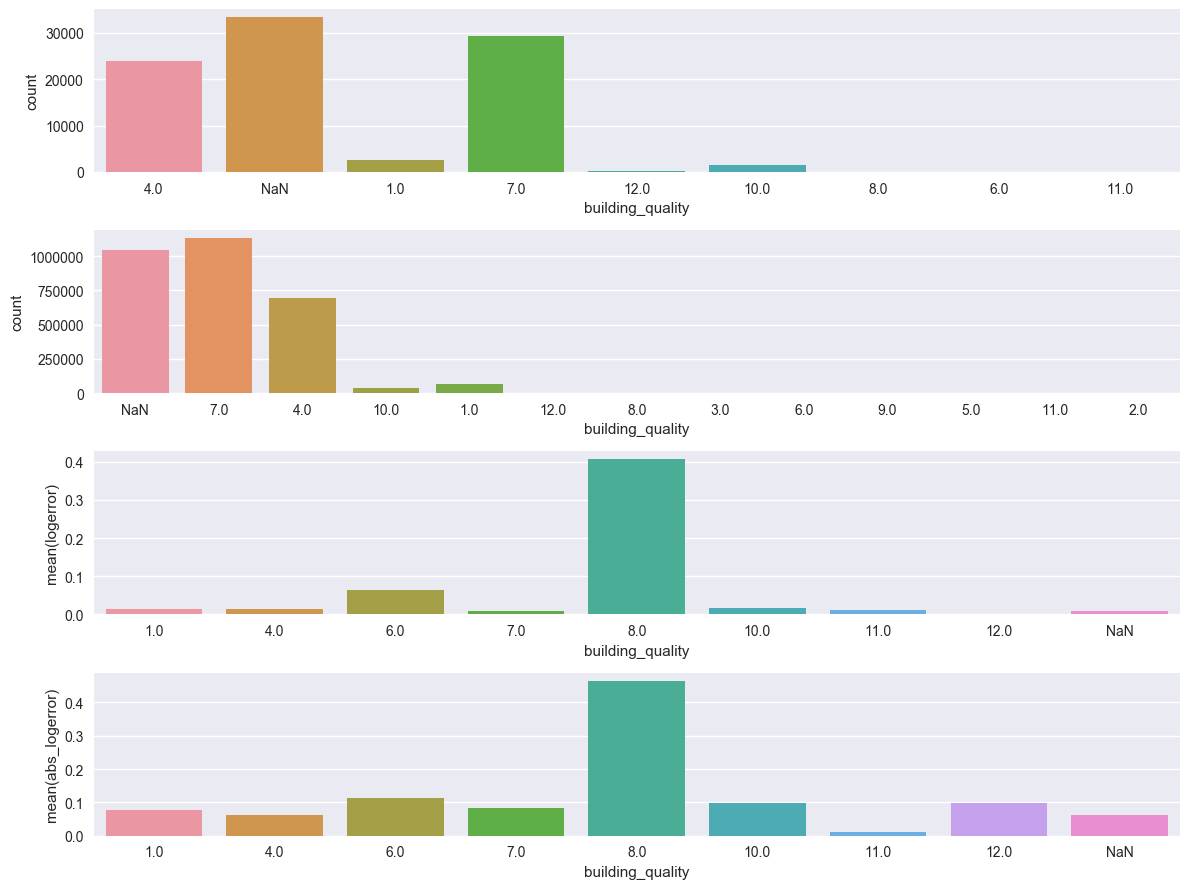

In [16]:
feature = 'building_quality'

fig  = plt.figure(figsize=(12, 9), dpi=100);
axes1 = fig.add_subplot(411); axes2 = fig.add_subplot(412); axes3 = fig.add_subplot(413); axes4 = fig.add_subplot(414); 
sns.countplot(train_df[feature].fillna('NaN'), ax=axes1); sns.countplot(sample_df[feature].fillna('NaN'),  ax=axes2);
bar_df1 = train_df[[feature,     "logerror"]].fillna('NaN').groupby([feature], as_index=False).mean()
bar_df2 = train_df[[feature, "abs_logerror"]].fillna('NaN').groupby([feature], as_index=False).mean()
sns.barplot(x=feature, y='logerror',     data=bar_df1, ax=axes3);
sns.barplot(x=feature, y='abs_logerror', data=bar_df2, ax=axes4);
fig.tight_layout()

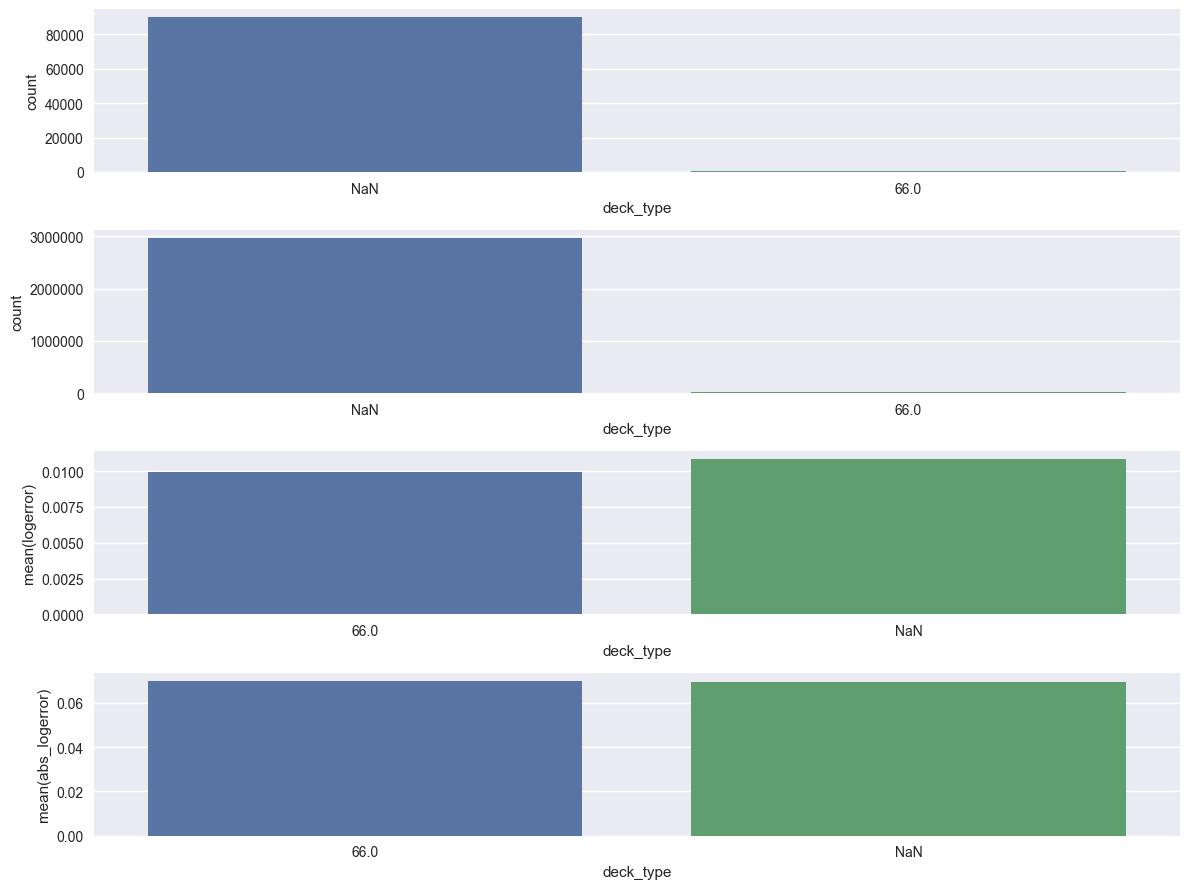

In [98]:
feature = 'deck_type'

fig  = plt.figure(figsize=(12, 9), dpi=100);
axes1 = fig.add_subplot(411); axes2 = fig.add_subplot(412); axes3 = fig.add_subplot(413); axes4 = fig.add_subplot(414); 
sns.countplot(train_df[feature].fillna('NaN'), ax=axes1); sns.countplot(sample_df[feature].fillna('NaN'),  ax=axes2);
bar_df1 = train_df[[feature,     "logerror"]].fillna('NaN').groupby([feature], as_index=False).mean()
bar_df2 = train_df[[feature, "abs_logerror"]].fillna('NaN').groupby([feature], as_index=False).mean()
sns.barplot(x=feature, y='logerror',     data=bar_df1, ax=axes3);
sns.barplot(x=feature, y='abs_logerror', data=bar_df2, ax=axes4);
fig.tight_layout()

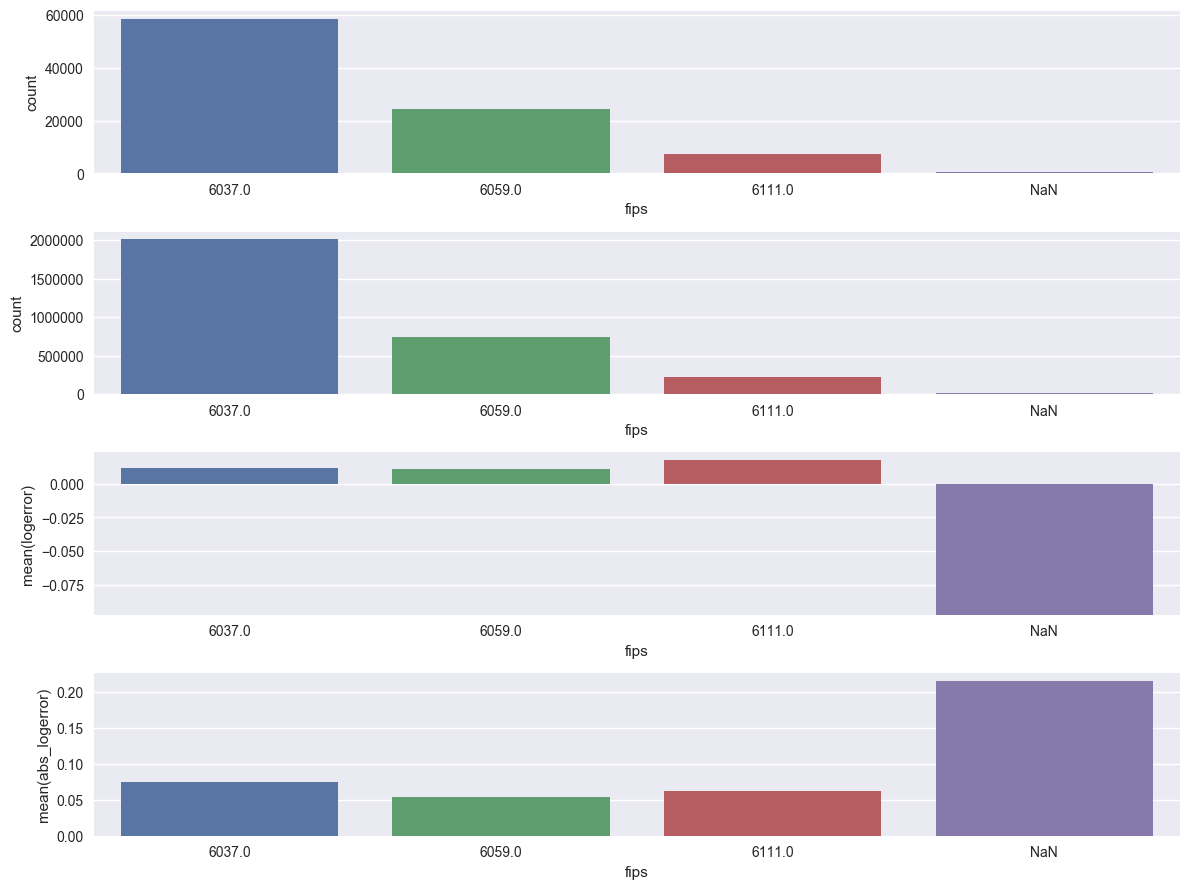

In [99]:
feature = 'fips'

fig  = plt.figure(figsize=(12, 9), dpi=100);
axes1 = fig.add_subplot(411); axes2 = fig.add_subplot(412); axes3 = fig.add_subplot(413); axes4 = fig.add_subplot(414); 
sns.countplot(train_df[feature].fillna('NaN'), ax=axes1); sns.countplot(sample_df[feature].fillna('NaN'),  ax=axes2);
bar_df1 = train_df[[feature,     "logerror"]].fillna('NaN').groupby([feature], as_index=False).mean()
bar_df2 = train_df[[feature, "abs_logerror"]].fillna('NaN').groupby([feature], as_index=False).mean()
sns.barplot(x=feature, y='logerror',     data=bar_df1, ax=axes3);
sns.barplot(x=feature, y='abs_logerror', data=bar_df2, ax=axes4);
fig.tight_layout()

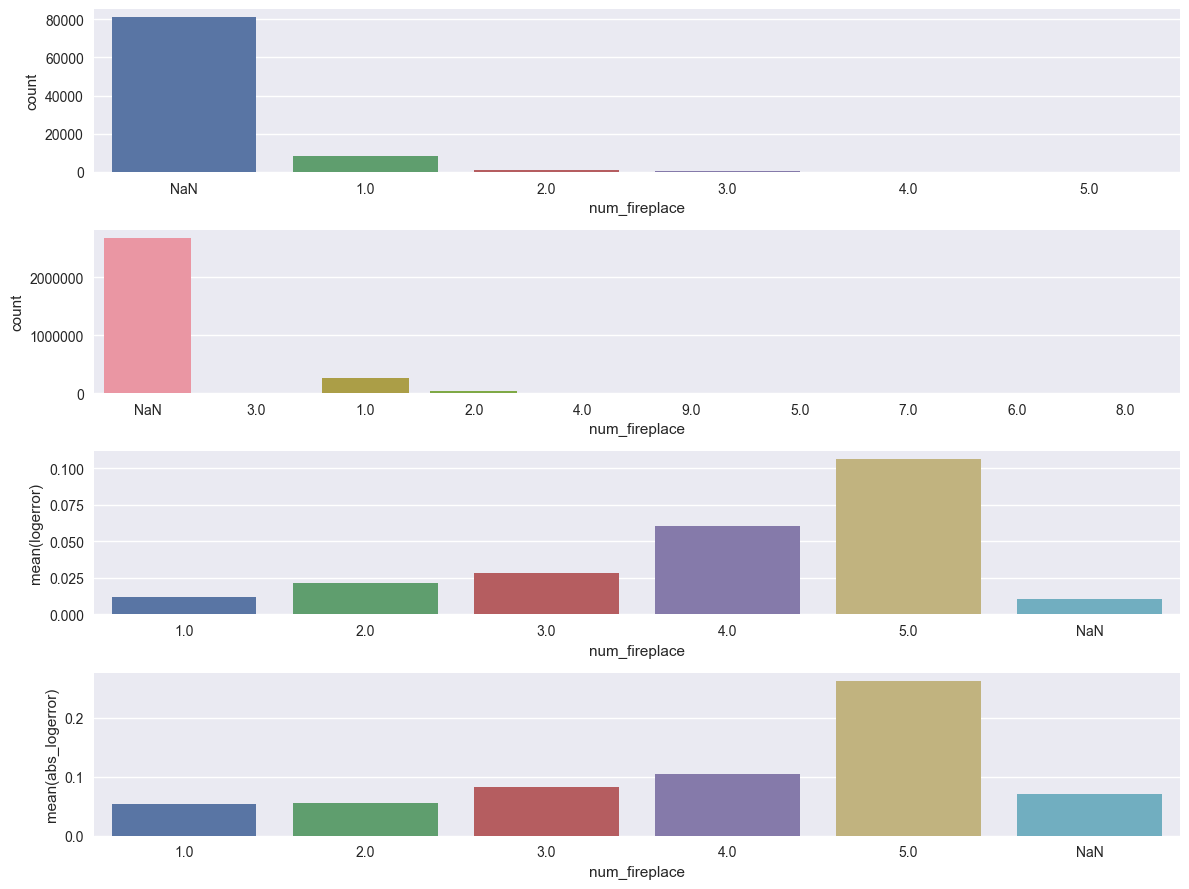

In [100]:
feature = 'num_fireplace'

fig  = plt.figure(figsize=(12, 9), dpi=100);
axes1 = fig.add_subplot(411); axes2 = fig.add_subplot(412); axes3 = fig.add_subplot(413); axes4 = fig.add_subplot(414); 
sns.countplot(train_df[feature].fillna('NaN'), ax=axes1); sns.countplot(sample_df[feature].fillna('NaN'),  ax=axes2);
bar_df1 = train_df[[feature,     "logerror"]].fillna('NaN').groupby([feature], as_index=False).mean()
bar_df2 = train_df[[feature, "abs_logerror"]].fillna('NaN').groupby([feature], as_index=False).mean()
sns.barplot(x=feature, y='logerror',     data=bar_df1, ax=axes3);
sns.barplot(x=feature, y='abs_logerror', data=bar_df2, ax=axes4);
fig.tight_layout()

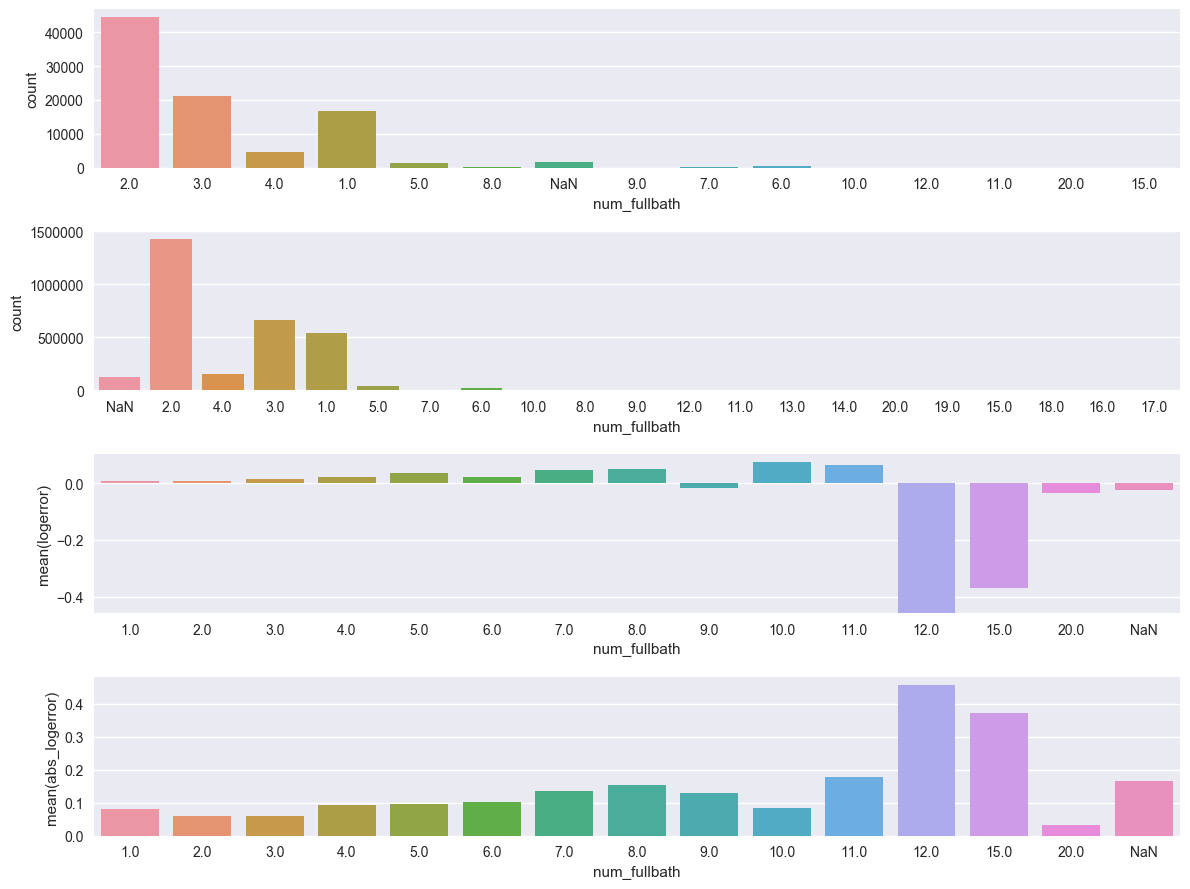

In [101]:
feature = 'num_fullbath'

fig  = plt.figure(figsize=(12, 9), dpi=100);
axes1 = fig.add_subplot(411); axes2 = fig.add_subplot(412); axes3 = fig.add_subplot(413); axes4 = fig.add_subplot(414); 
sns.countplot(train_df[feature].fillna('NaN'), ax=axes1); sns.countplot(sample_df[feature].fillna('NaN'),  ax=axes2);
bar_df1 = train_df[[feature,     "logerror"]].fillna('NaN').groupby([feature], as_index=False).mean()
bar_df2 = train_df[[feature, "abs_logerror"]].fillna('NaN').groupby([feature], as_index=False).mean()
sns.barplot(x=feature, y='logerror',     data=bar_df1, ax=axes3);
sns.barplot(x=feature, y='abs_logerror', data=bar_df2, ax=axes4);
fig.tight_layout()

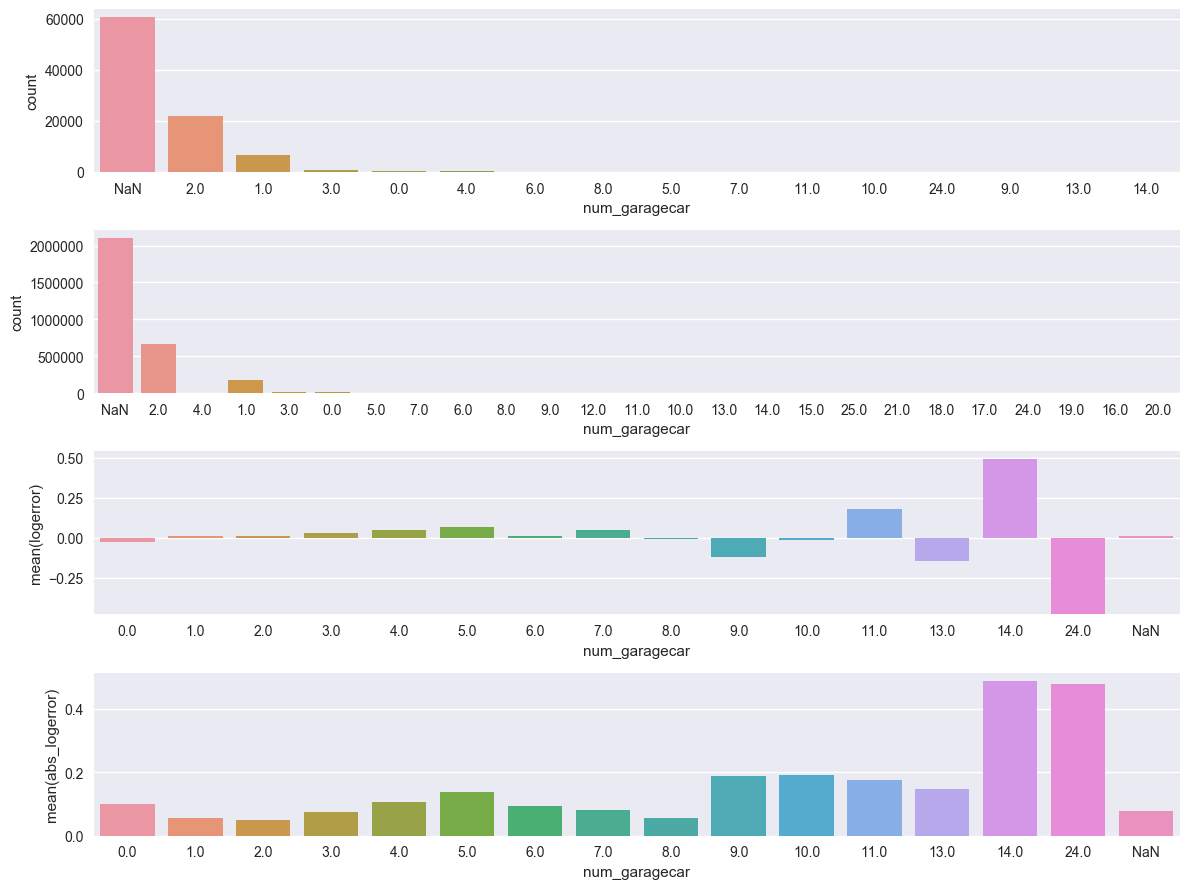

In [102]:
feature = 'num_garagecar'

fig  = plt.figure(figsize=(12, 9), dpi=100);
axes1 = fig.add_subplot(411); axes2 = fig.add_subplot(412); axes3 = fig.add_subplot(413); axes4 = fig.add_subplot(414); 
sns.countplot(train_df[feature].fillna('NaN'), ax=axes1); sns.countplot(sample_df[feature].fillna('NaN'),  ax=axes2);
bar_df1 = train_df[[feature,     "logerror"]].fillna('NaN').groupby([feature], as_index=False).mean()
bar_df2 = train_df[[feature, "abs_logerror"]].fillna('NaN').groupby([feature], as_index=False).mean()
sns.barplot(x=feature, y='logerror',     data=bar_df1, ax=axes3);
sns.barplot(x=feature, y='abs_logerror', data=bar_df2, ax=axes4);
fig.tight_layout()

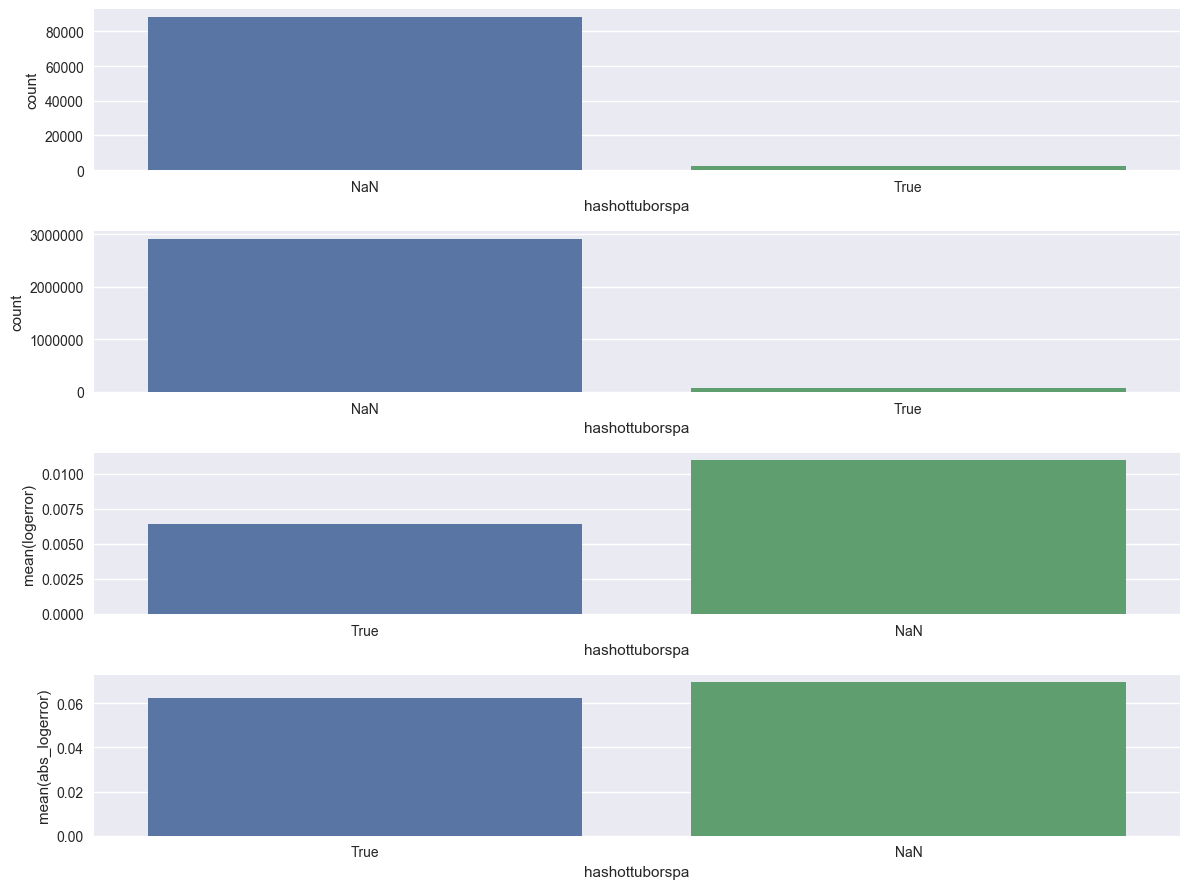

In [103]:
feature = 'hashottuborspa'

fig  = plt.figure(figsize=(12, 9), dpi=100);
axes1 = fig.add_subplot(411); axes2 = fig.add_subplot(412); axes3 = fig.add_subplot(413); axes4 = fig.add_subplot(414); 
sns.countplot(train_df[feature].fillna('NaN'), ax=axes1); sns.countplot(sample_df[feature].fillna('NaN'),  ax=axes2);
bar_df1 = train_df[[feature,     "logerror"]].fillna('NaN').groupby([feature], as_index=False).mean()
bar_df2 = train_df[[feature, "abs_logerror"]].fillna('NaN').groupby([feature], as_index=False).mean()
sns.barplot(x=feature, y='logerror',     data=bar_df1, ax=axes3);
sns.barplot(x=feature, y='abs_logerror', data=bar_df2, ax=axes4);
fig.tight_layout()

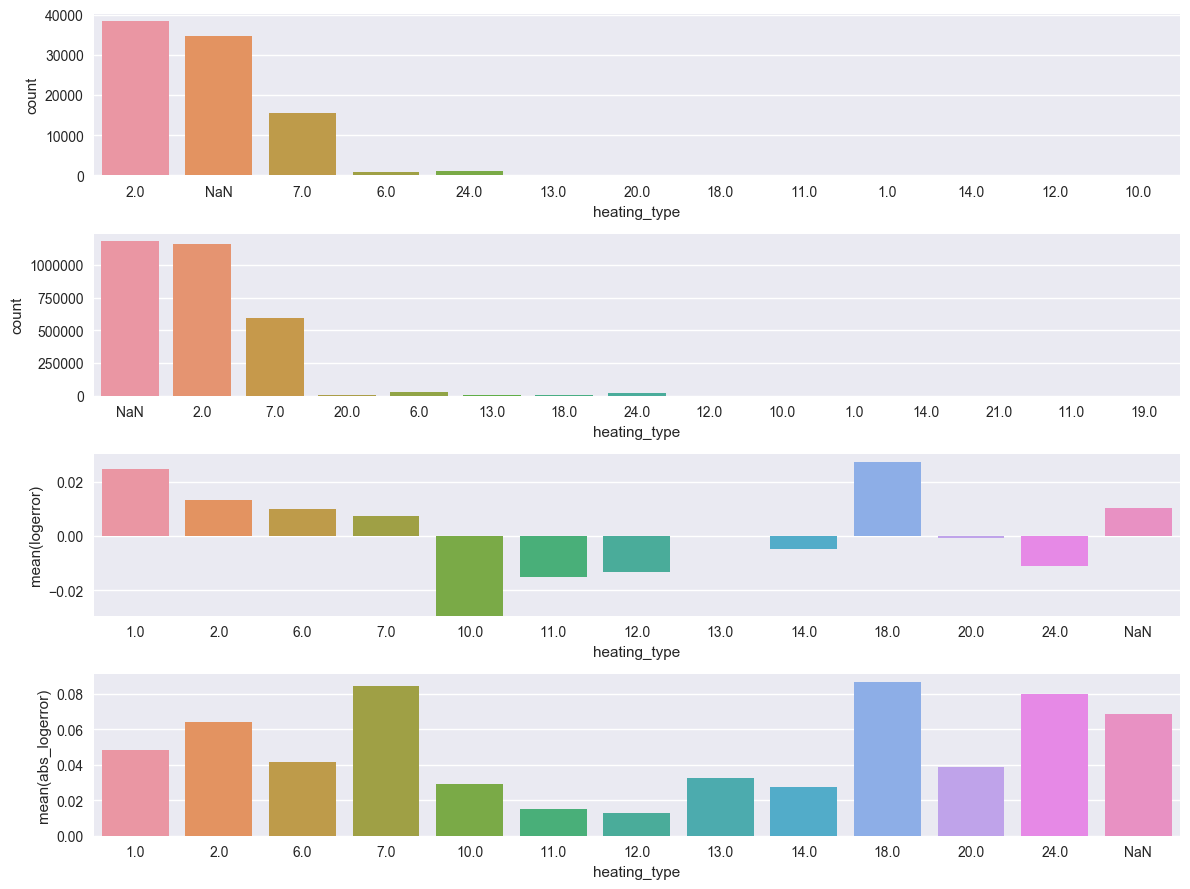

In [104]:
feature = 'heating_type'

fig  = plt.figure(figsize=(12, 9), dpi=100);
axes1 = fig.add_subplot(411); axes2 = fig.add_subplot(412); axes3 = fig.add_subplot(413); axes4 = fig.add_subplot(414); 
sns.countplot(train_df[feature].fillna('NaN'), ax=axes1); sns.countplot(sample_df[feature].fillna('NaN'),  ax=axes2);
bar_df1 = train_df[[feature,     "logerror"]].fillna('NaN').groupby([feature], as_index=False).mean()
bar_df2 = train_df[[feature, "abs_logerror"]].fillna('NaN').groupby([feature], as_index=False).mean()
sns.barplot(x=feature, y='logerror',     data=bar_df1, ax=axes3);
sns.barplot(x=feature, y='abs_logerror', data=bar_df2, ax=axes4);
fig.tight_layout()

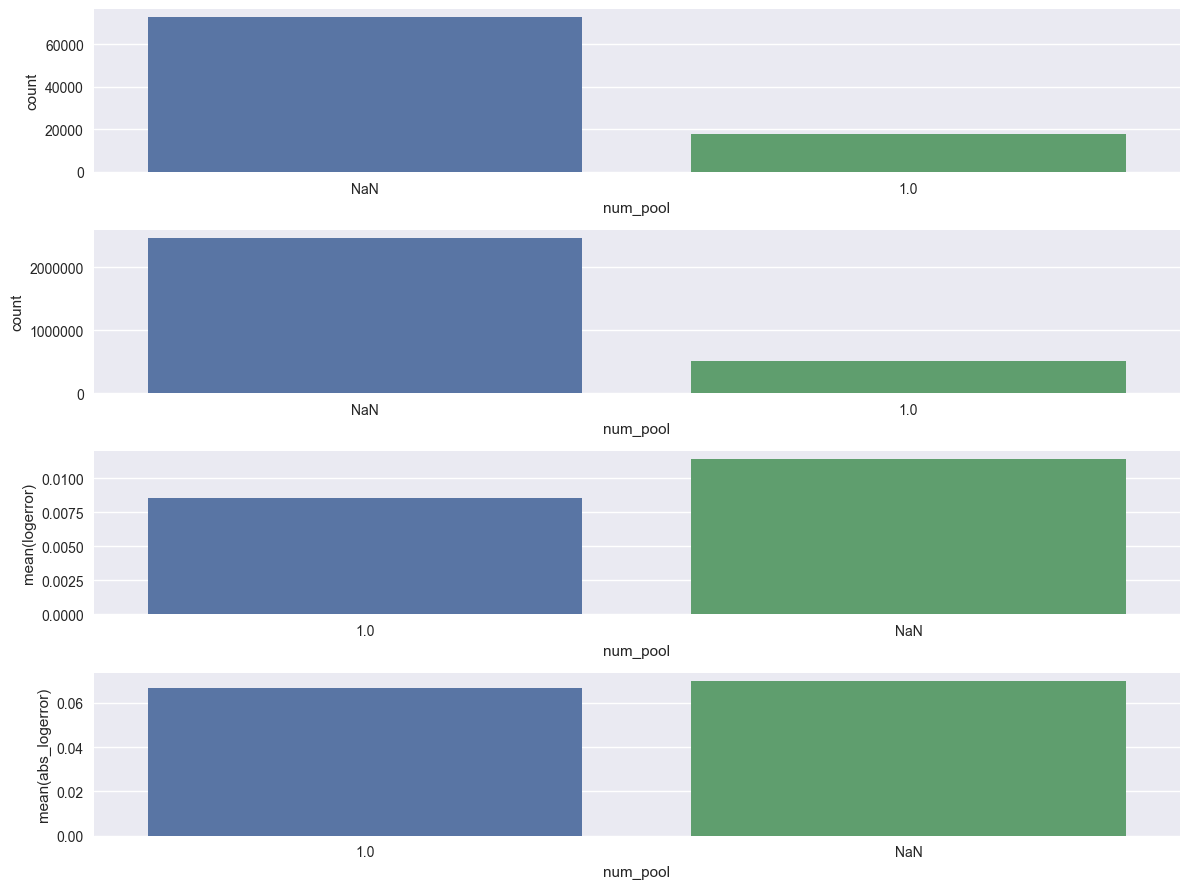

In [105]:
feature = 'num_pool'

fig  = plt.figure(figsize=(12, 9), dpi=100);
axes1 = fig.add_subplot(411); axes2 = fig.add_subplot(412); axes3 = fig.add_subplot(413); axes4 = fig.add_subplot(414); 
sns.countplot(train_df[feature].fillna('NaN'), ax=axes1); sns.countplot(sample_df[feature].fillna('NaN'),  ax=axes2);
bar_df1 = train_df[[feature,     "logerror"]].fillna('NaN').groupby([feature], as_index=False).mean()
bar_df2 = train_df[[feature, "abs_logerror"]].fillna('NaN').groupby([feature], as_index=False).mean()
sns.barplot(x=feature, y='logerror',     data=bar_df1, ax=axes3);
sns.barplot(x=feature, y='abs_logerror', data=bar_df2, ax=axes4);
fig.tight_layout()

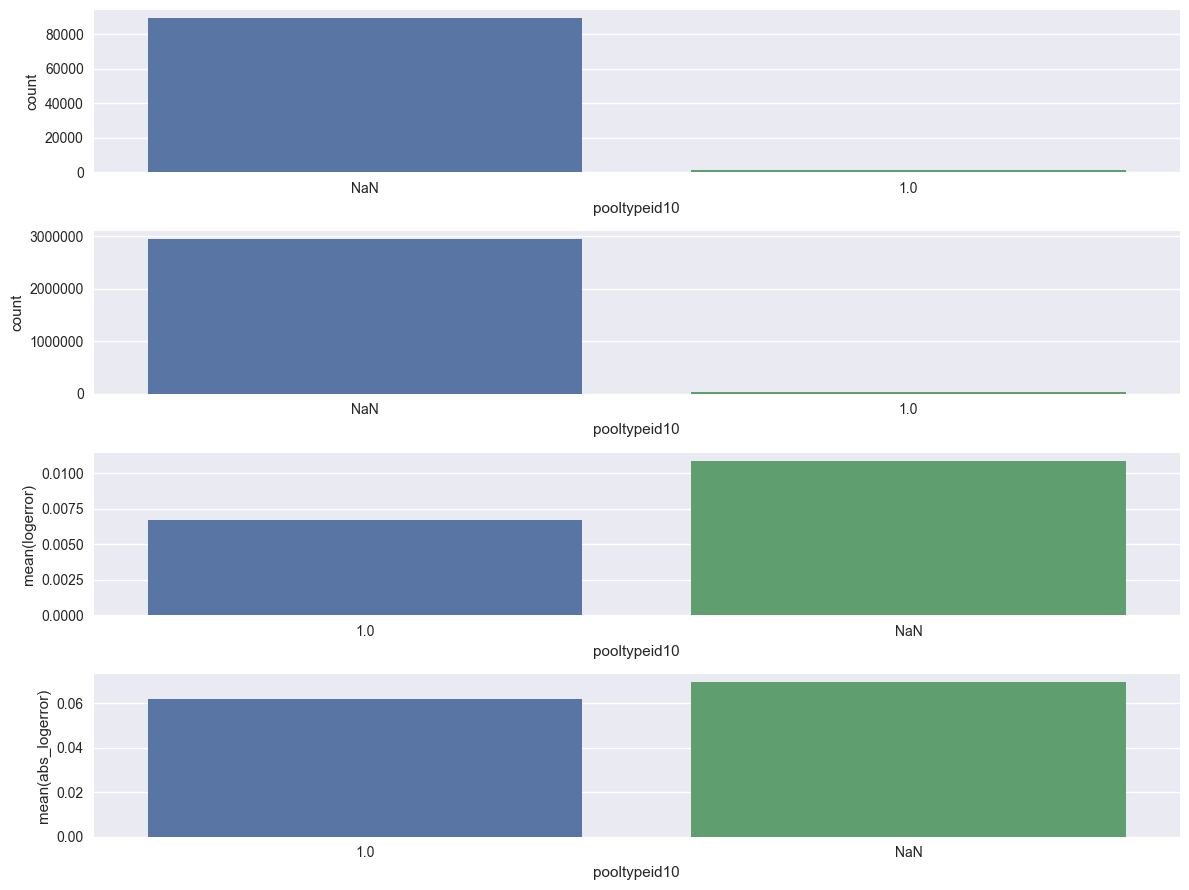

In [106]:
feature = 'pooltypeid10'

fig  = plt.figure(figsize=(12, 9), dpi=100);
axes1 = fig.add_subplot(411); axes2 = fig.add_subplot(412); axes3 = fig.add_subplot(413); axes4 = fig.add_subplot(414); 
sns.countplot(train_df[feature].fillna('NaN'), ax=axes1); sns.countplot(sample_df[feature].fillna('NaN'),  ax=axes2);
bar_df1 = train_df[[feature,     "logerror"]].fillna('NaN').groupby([feature], as_index=False).mean()
bar_df2 = train_df[[feature, "abs_logerror"]].fillna('NaN').groupby([feature], as_index=False).mean()
sns.barplot(x=feature, y='logerror',     data=bar_df1, ax=axes3);
sns.barplot(x=feature, y='abs_logerror', data=bar_df2, ax=axes4);
fig.tight_layout()

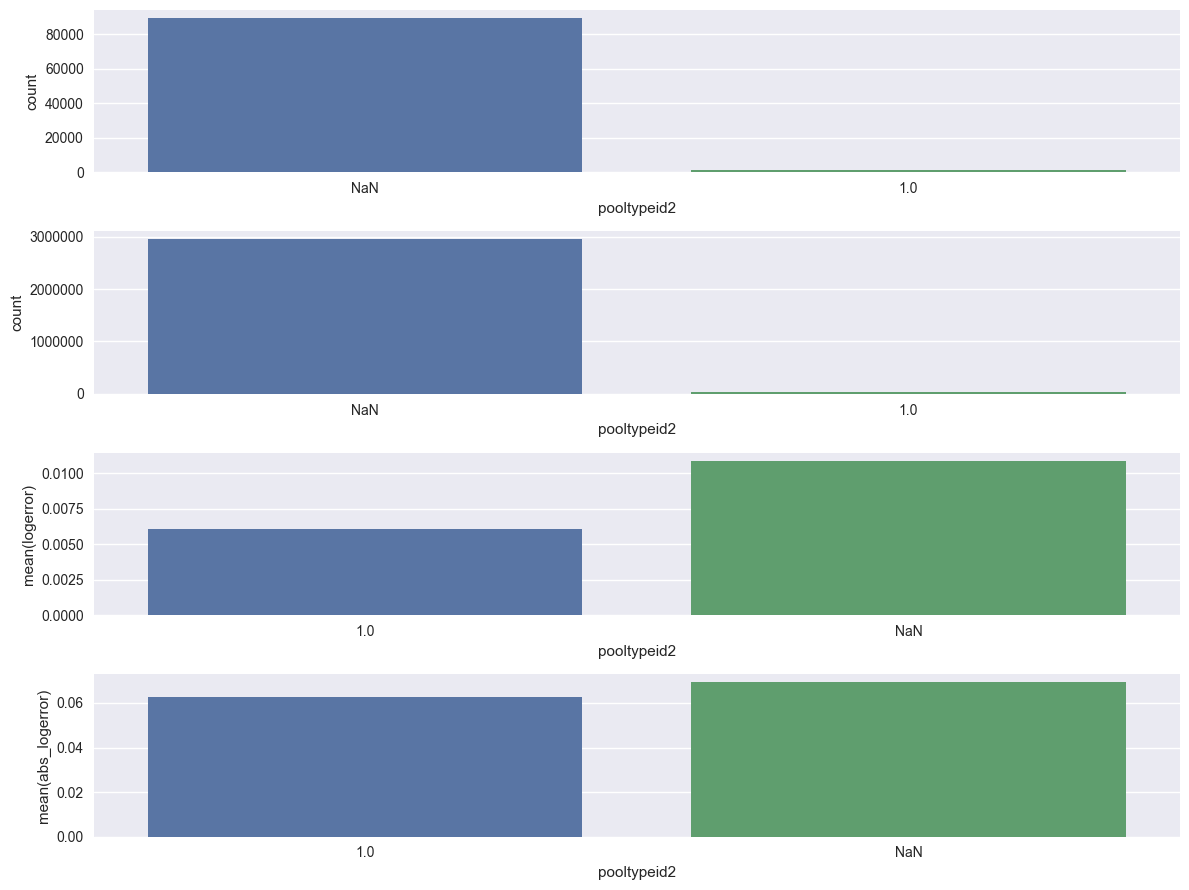

In [107]:
feature = 'pooltypeid2'

fig  = plt.figure(figsize=(12, 9), dpi=100);
axes1 = fig.add_subplot(411); axes2 = fig.add_subplot(412); axes3 = fig.add_subplot(413); axes4 = fig.add_subplot(414); 
sns.countplot(train_df[feature].fillna('NaN'), ax=axes1); sns.countplot(sample_df[feature].fillna('NaN'),  ax=axes2);
bar_df1 = train_df[[feature,     "logerror"]].fillna('NaN').groupby([feature], as_index=False).mean()
bar_df2 = train_df[[feature, "abs_logerror"]].fillna('NaN').groupby([feature], as_index=False).mean()
sns.barplot(x=feature, y='logerror',     data=bar_df1, ax=axes3);
sns.barplot(x=feature, y='abs_logerror', data=bar_df2, ax=axes4);
fig.tight_layout()

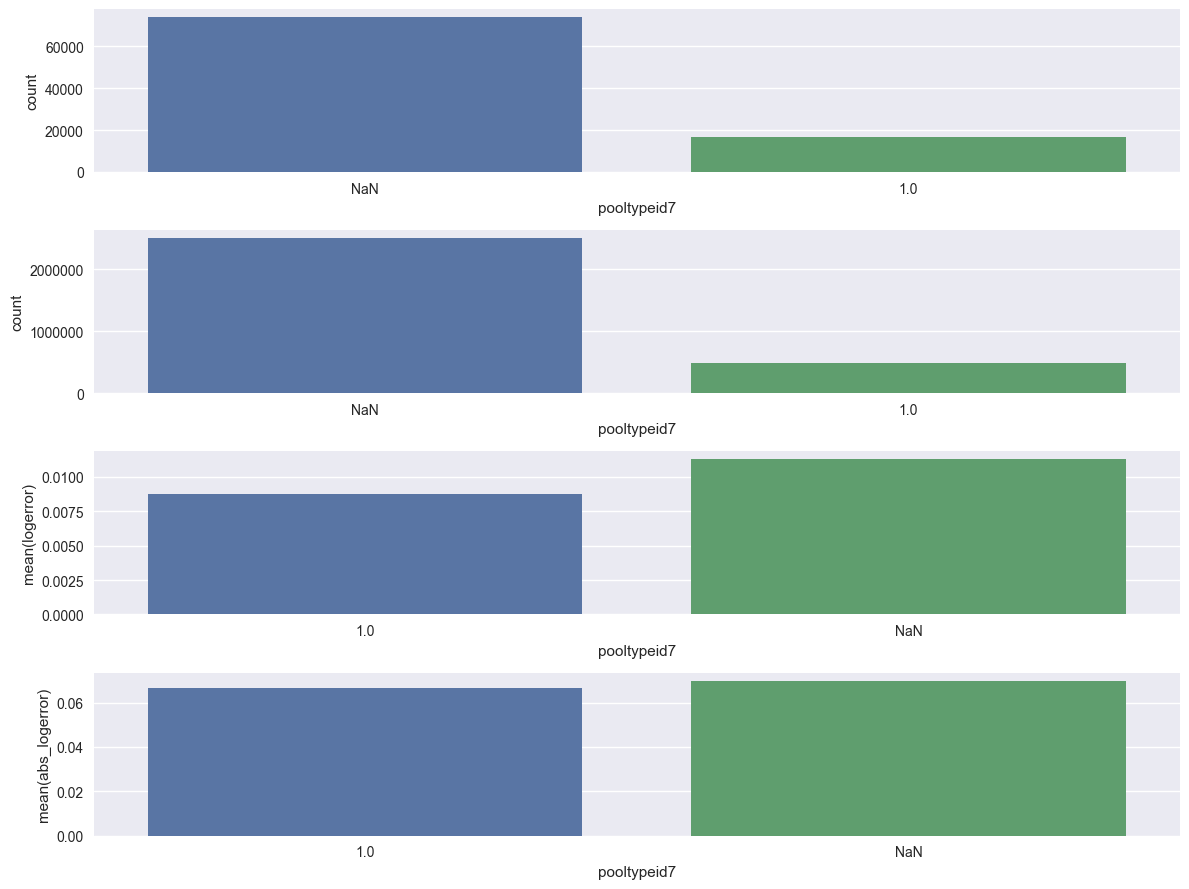

In [108]:
feature = 'pooltypeid7'

fig  = plt.figure(figsize=(12, 9), dpi=100);
axes1 = fig.add_subplot(411); axes2 = fig.add_subplot(412); axes3 = fig.add_subplot(413); axes4 = fig.add_subplot(414); 
sns.countplot(train_df[feature].fillna('NaN'), ax=axes1); sns.countplot(sample_df[feature].fillna('NaN'),  ax=axes2);
bar_df1 = train_df[[feature,     "logerror"]].fillna('NaN').groupby([feature], as_index=False).mean()
bar_df2 = train_df[[feature, "abs_logerror"]].fillna('NaN').groupby([feature], as_index=False).mean()
sns.barplot(x=feature, y='logerror',     data=bar_df1, ax=axes3);
sns.barplot(x=feature, y='abs_logerror', data=bar_df2, ax=axes4);
fig.tight_layout()

In [17]:
print(len(train_df['census_raw_tract_block'].unique()))

471


In [18]:
print(len(train_df['census_tract_block'].unique()))

446


In [5]:
train_df.columns.values

array(['parcelid', 'logerror', 'transactiondate'], dtype=object)

In [8]:
print(len(train_df['region_city'].unique()))

178


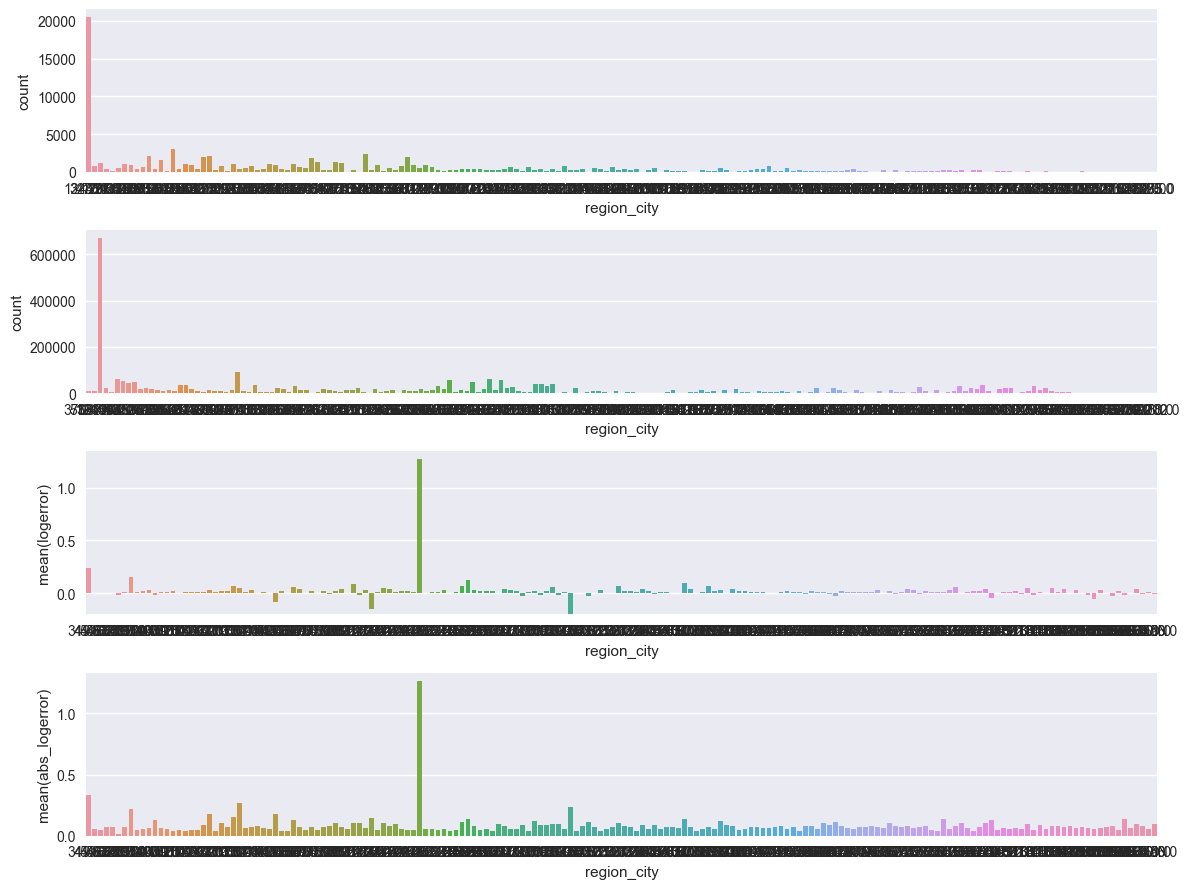

In [109]:
feature = 'region_city'

fig  = plt.figure(figsize=(12, 9), dpi=100);
axes1 = fig.add_subplot(411); axes2 = fig.add_subplot(412); axes3 = fig.add_subplot(413); axes4 = fig.add_subplot(414); 
sns.countplot(train_df[feature].fillna('NaN'), ax=axes1); sns.countplot(sample_df[feature].fillna('NaN'),  ax=axes2);
bar_df1 = train_df[[feature,     "logerror"]].fillna('NaN').groupby([feature], as_index=False).mean()
bar_df2 = train_df[[feature, "abs_logerror"]].fillna('NaN').groupby([feature], as_index=False).mean()
sns.barplot(x=feature, y='logerror',     data=bar_df1, ax=axes3);
sns.barplot(x=feature, y='abs_logerror', data=bar_df2, ax=axes4);
fig.tight_layout()

In [9]:
print(len(train_df['region_county'].unique()))

4


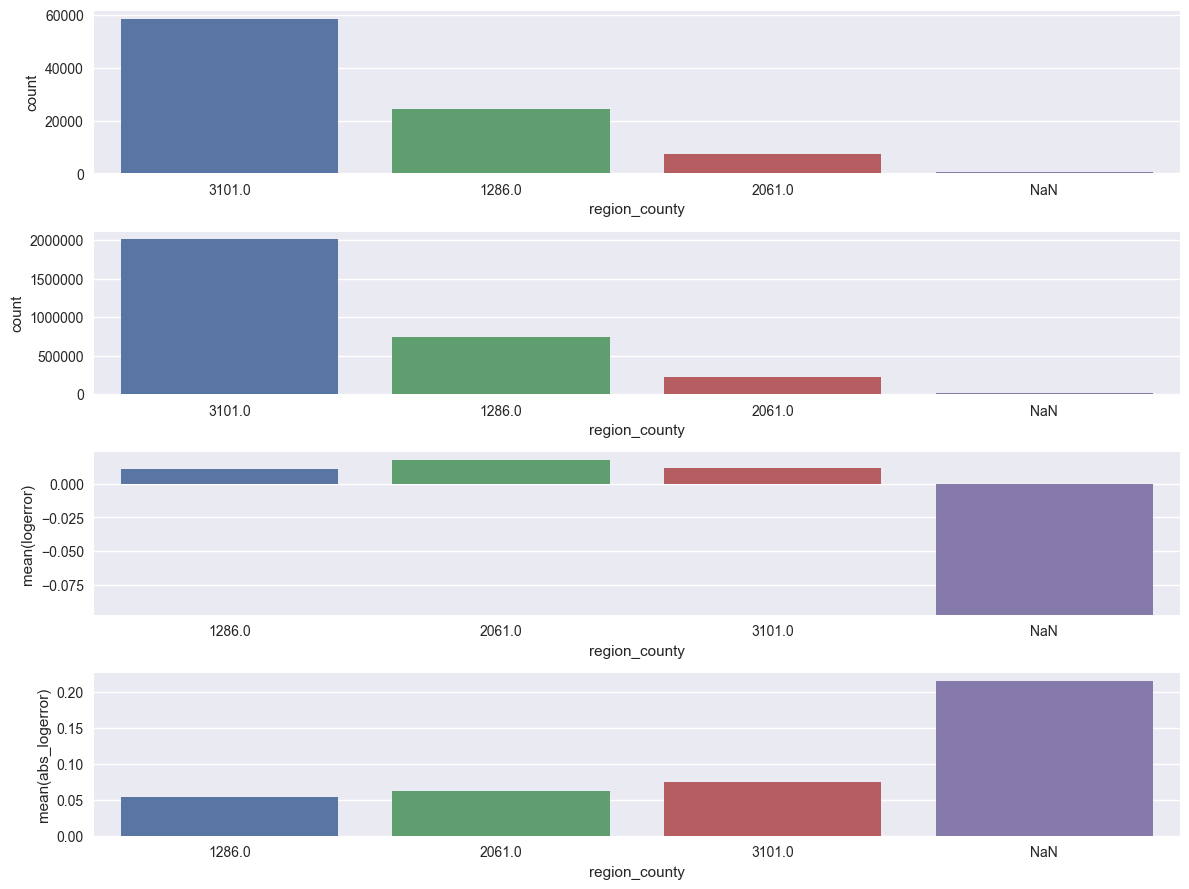

In [110]:
feature = 'region_county'

fig  = plt.figure(figsize=(12, 9), dpi=100);
axes1 = fig.add_subplot(411); axes2 = fig.add_subplot(412); axes3 = fig.add_subplot(413); axes4 = fig.add_subplot(414); 
sns.countplot(train_df[feature].fillna('NaN'), ax=axes1); sns.countplot(sample_df[feature].fillna('NaN'),  ax=axes2);
bar_df1 = train_df[[feature,     "logerror"]].fillna('NaN').groupby([feature], as_index=False).mean()
bar_df2 = train_df[[feature, "abs_logerror"]].fillna('NaN').groupby([feature], as_index=False).mean()
sns.barplot(x=feature, y='logerror',     data=bar_df1, ax=axes3);
sns.barplot(x=feature, y='abs_logerror', data=bar_df2, ax=axes4);
fig.tight_layout()

495


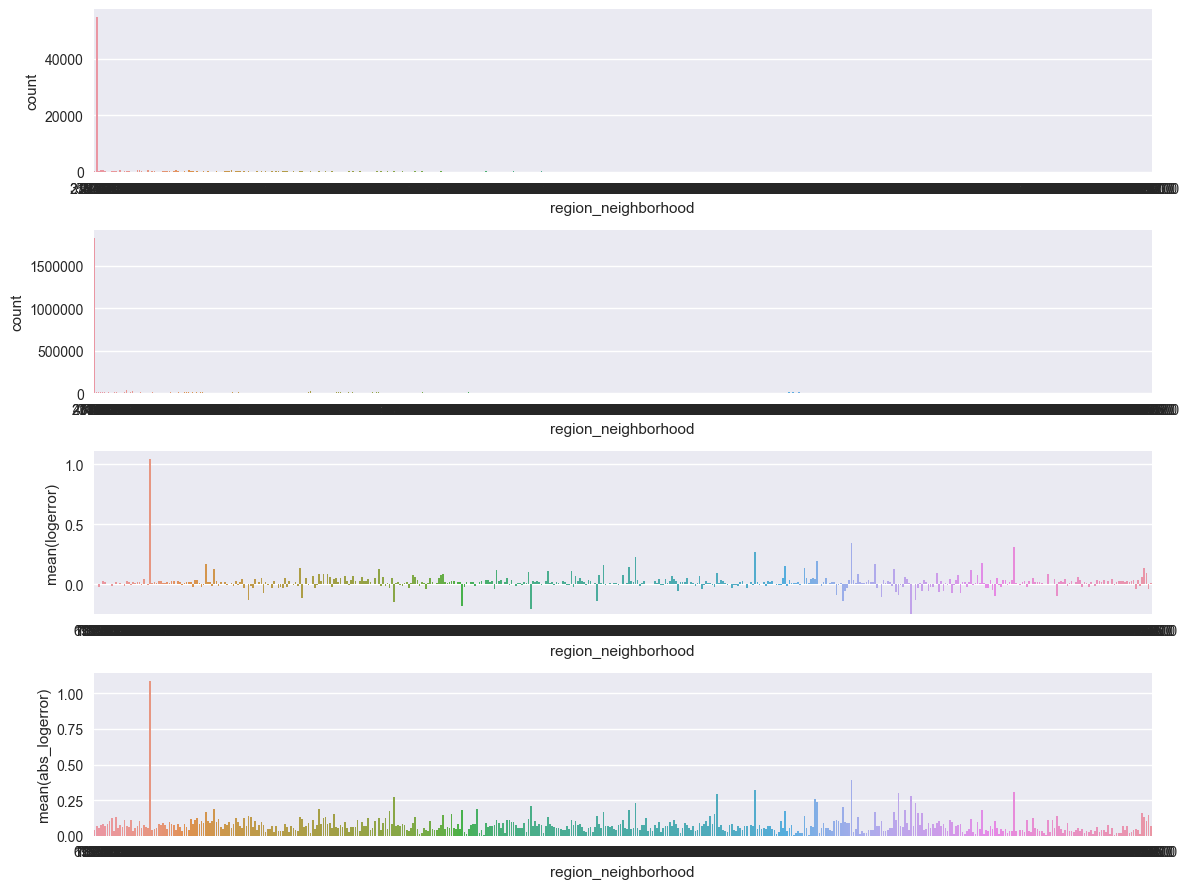

In [111]:
print(len(train_df['region_neighborhood'].unique()))

feature = 'region_neighborhood'

fig  = plt.figure(figsize=(12, 9), dpi=100);
axes1 = fig.add_subplot(411); axes2 = fig.add_subplot(412); axes3 = fig.add_subplot(413); axes4 = fig.add_subplot(414); 
sns.countplot(train_df[feature].fillna('NaN'), ax=axes1); sns.countplot(sample_df[feature].fillna('NaN'),  ax=axes2);
bar_df1 = train_df[[feature,     "logerror"]].fillna('NaN').groupby([feature], as_index=False).mean()
bar_df2 = train_df[[feature, "abs_logerror"]].fillna('NaN').groupby([feature], as_index=False).mean()
sns.barplot(x=feature, y='logerror',     data=bar_df1, ax=axes3);
sns.barplot(x=feature, y='abs_logerror', data=bar_df2, ax=axes4);
fig.tight_layout()

389


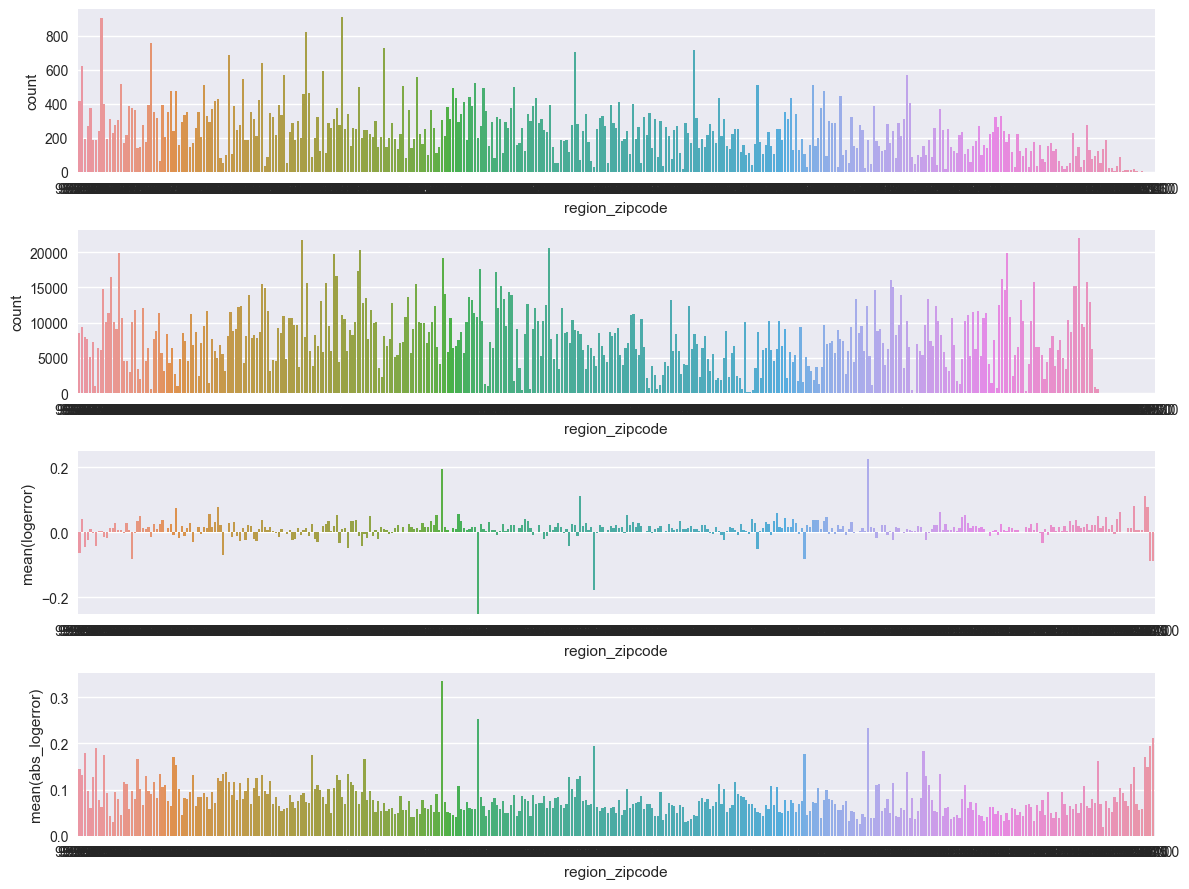

In [112]:
print(len(train_df['region_zipcode'].unique()))

feature = 'region_zipcode'

fig  = plt.figure(figsize=(12, 9), dpi=100);
axes1 = fig.add_subplot(411); axes2 = fig.add_subplot(412); axes3 = fig.add_subplot(413); axes4 = fig.add_subplot(414); 
sns.countplot(train_df[feature].fillna('NaN'), ax=axes1); sns.countplot(sample_df[feature].fillna('NaN'),  ax=axes2);
bar_df1 = train_df[[feature,     "logerror"]].fillna('NaN').groupby([feature], as_index=False).mean()
bar_df2 = train_df[[feature, "abs_logerror"]].fillna('NaN').groupby([feature], as_index=False).mean()
sns.barplot(x=feature, y='logerror',     data=bar_df1, ax=axes3);
sns.barplot(x=feature, y='abs_logerror', data=bar_df2, ax=axes4);
fig.tight_layout()

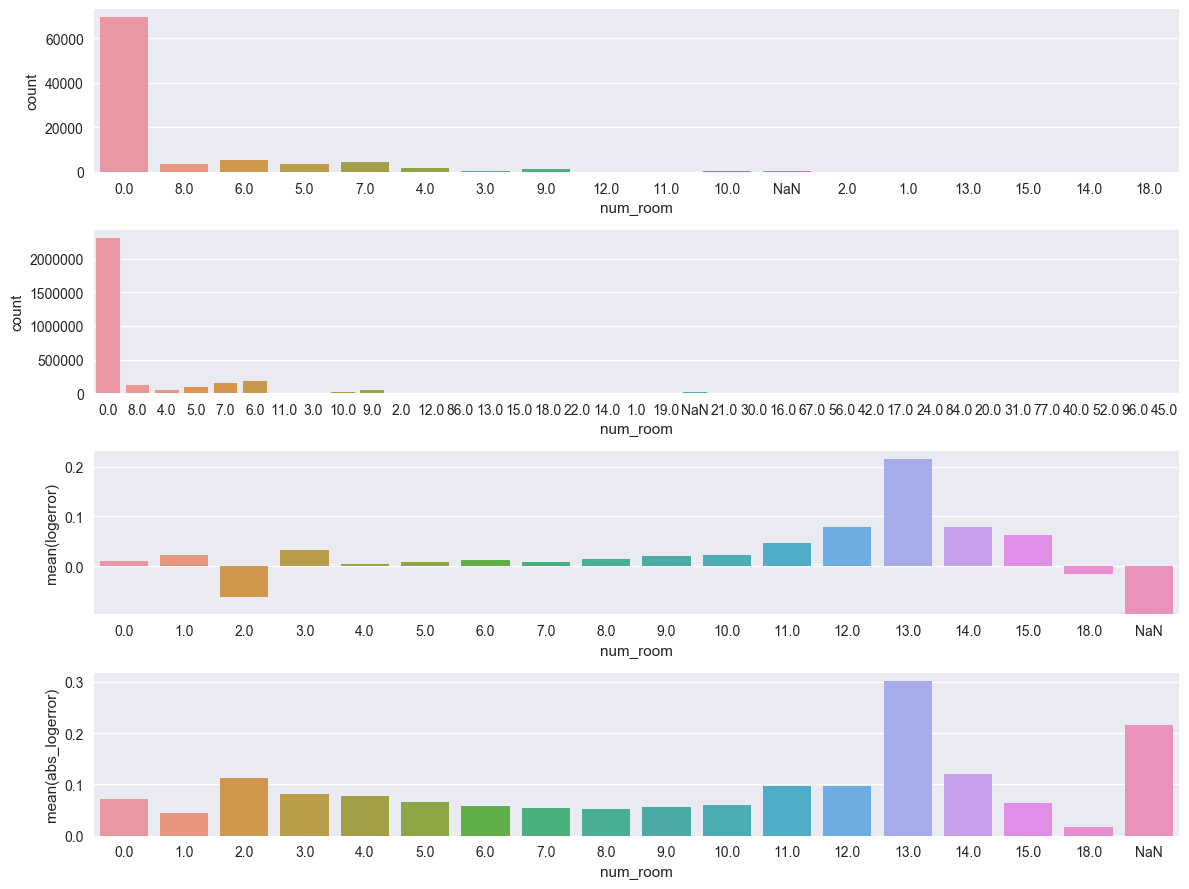

In [113]:
feature = 'num_room'

fig  = plt.figure(figsize=(12, 9), dpi=100);
axes1 = fig.add_subplot(411); axes2 = fig.add_subplot(412); axes3 = fig.add_subplot(413); axes4 = fig.add_subplot(414); 
sns.countplot(train_df[feature].fillna('NaN'), ax=axes1); sns.countplot(sample_df[feature].fillna('NaN'),  ax=axes2);
bar_df1 = train_df[[feature,     "logerror"]].fillna('NaN').groupby([feature], as_index=False).mean()
bar_df2 = train_df[[feature, "abs_logerror"]].fillna('NaN').groupby([feature], as_index=False).mean()
sns.barplot(x=feature, y='logerror',     data=bar_df1, ax=axes3);
sns.barplot(x=feature, y='abs_logerror', data=bar_df2, ax=axes4);
fig.tight_layout()

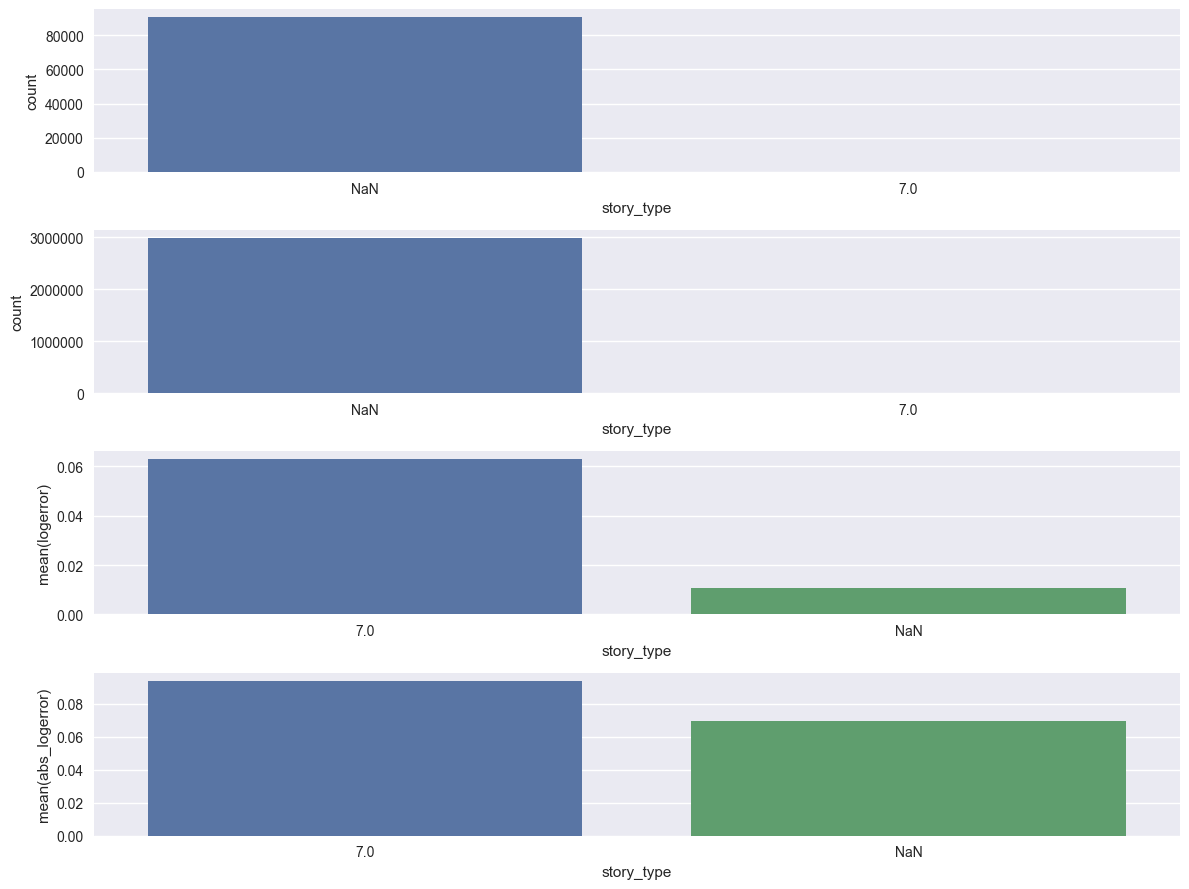

In [114]:
feature = 'story_type'

fig  = plt.figure(figsize=(12, 9), dpi=100);
axes1 = fig.add_subplot(411); axes2 = fig.add_subplot(412); axes3 = fig.add_subplot(413); axes4 = fig.add_subplot(414); 
sns.countplot(train_df[feature].fillna('NaN'), ax=axes1); sns.countplot(sample_df[feature].fillna('NaN'),  ax=axes2);
bar_df1 = train_df[[feature,     "logerror"]].fillna('NaN').groupby([feature], as_index=False).mean()
bar_df2 = train_df[[feature, "abs_logerror"]].fillna('NaN').groupby([feature], as_index=False).mean()
sns.barplot(x=feature, y='logerror',     data=bar_df1, ax=axes3);
sns.barplot(x=feature, y='abs_logerror', data=bar_df2, ax=axes4);
fig.tight_layout()

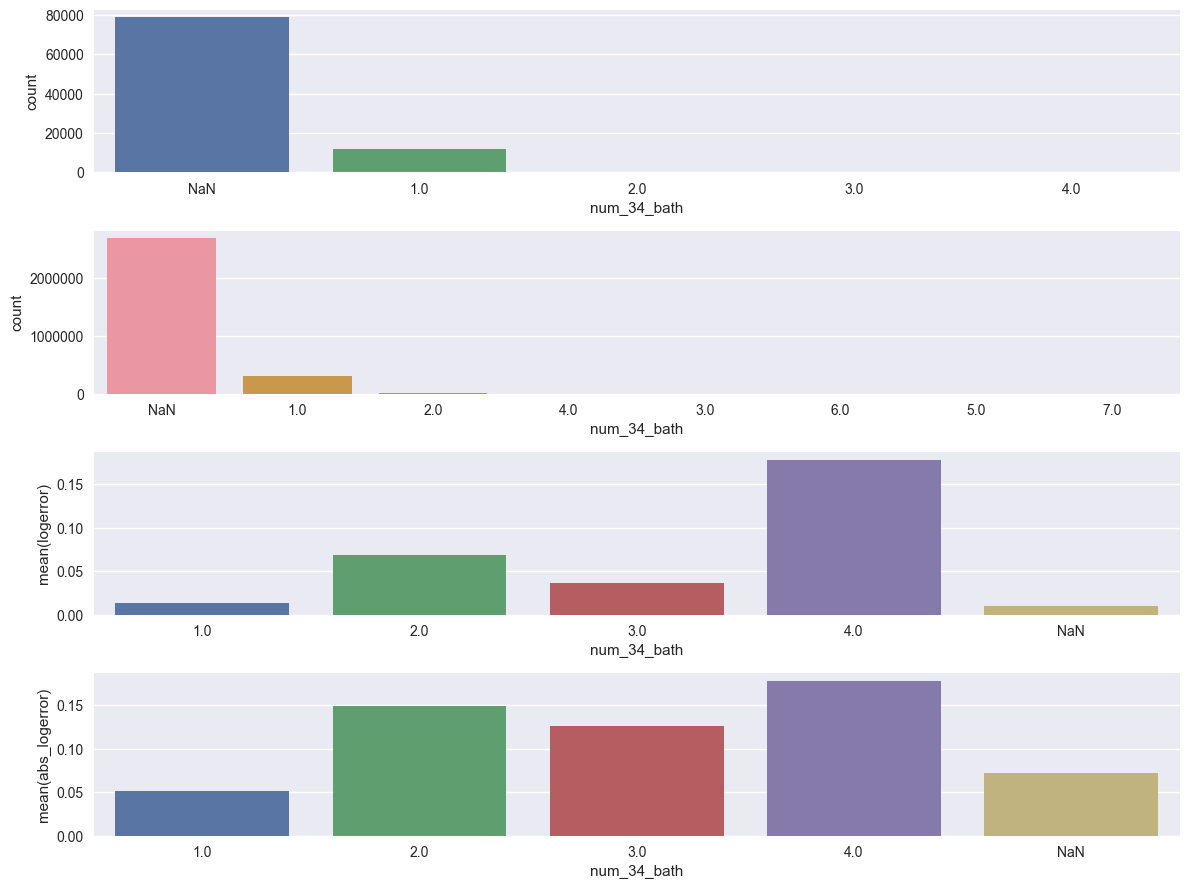

In [115]:
feature = 'num_34_bath'

fig  = plt.figure(figsize=(12, 9), dpi=100);
axes1 = fig.add_subplot(411); axes2 = fig.add_subplot(412); axes3 = fig.add_subplot(413); axes4 = fig.add_subplot(414); 
sns.countplot(train_df[feature].fillna('NaN'), ax=axes1); sns.countplot(sample_df[feature].fillna('NaN'),  ax=axes2);
bar_df1 = train_df[[feature,     "logerror"]].fillna('NaN').groupby([feature], as_index=False).mean()
bar_df2 = train_df[[feature, "abs_logerror"]].fillna('NaN').groupby([feature], as_index=False).mean()
sns.barplot(x=feature, y='logerror',     data=bar_df1, ax=axes3);
sns.barplot(x=feature, y='abs_logerror', data=bar_df2, ax=axes4);
fig.tight_layout()

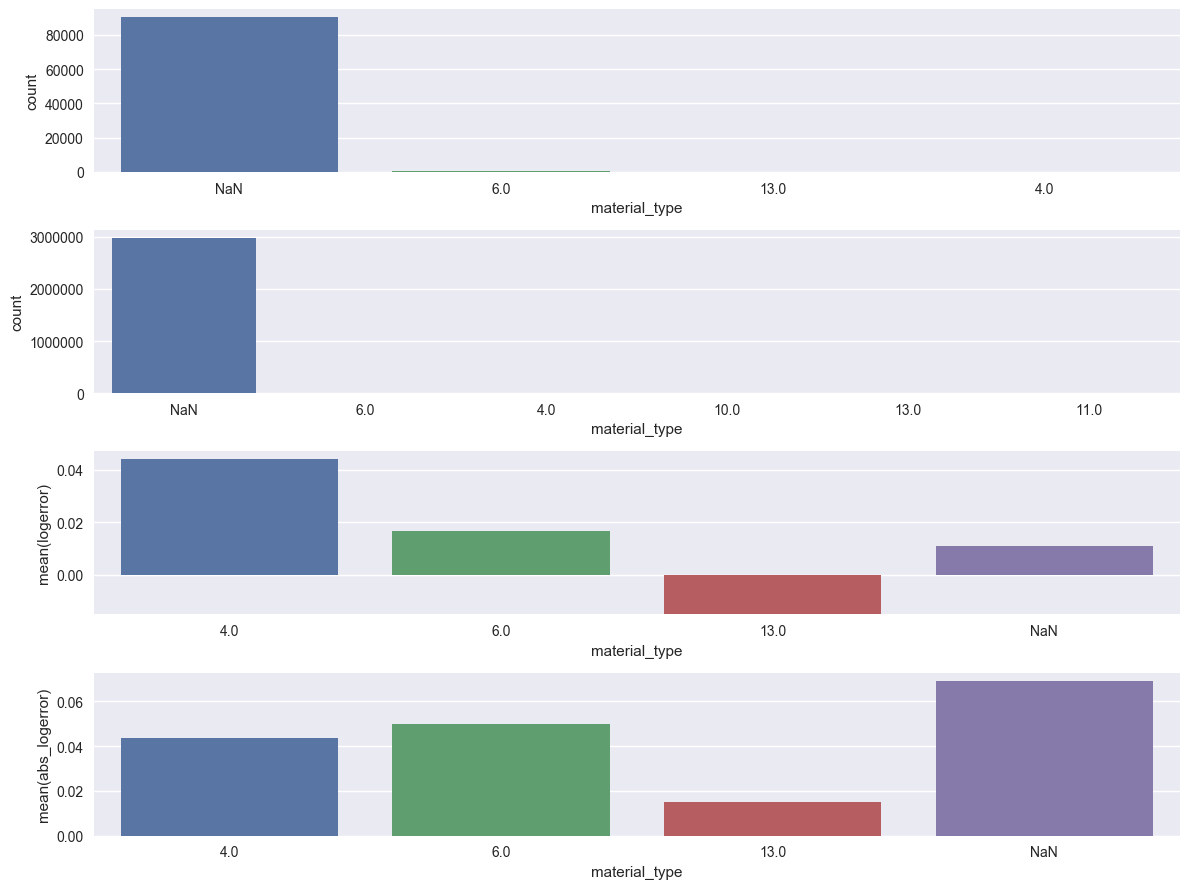

In [116]:
feature = 'material_type'

fig  = plt.figure(figsize=(12, 9), dpi=100);
axes1 = fig.add_subplot(411); axes2 = fig.add_subplot(412); axes3 = fig.add_subplot(413); axes4 = fig.add_subplot(414); 
sns.countplot(train_df[feature].fillna('NaN'), ax=axes1); sns.countplot(sample_df[feature].fillna('NaN'),  ax=axes2);
bar_df1 = train_df[[feature,     "logerror"]].fillna('NaN').groupby([feature], as_index=False).mean()
bar_df2 = train_df[[feature, "abs_logerror"]].fillna('NaN').groupby([feature], as_index=False).mean()
sns.barplot(x=feature, y='logerror',     data=bar_df1, ax=axes3);
sns.barplot(x=feature, y='abs_logerror', data=bar_df2, ax=axes4);
fig.tight_layout()

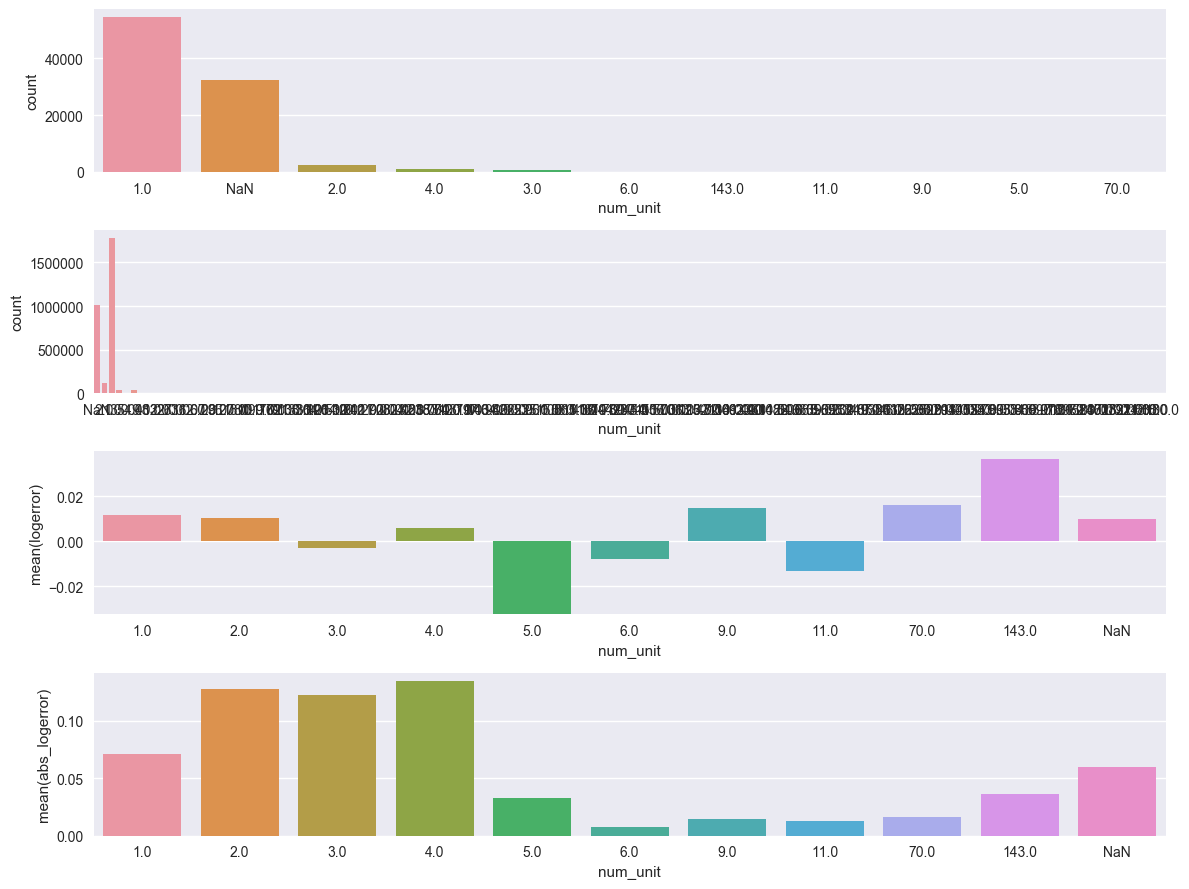

In [117]:
feature = 'num_unit'

fig  = plt.figure(figsize=(12, 9), dpi=100);
axes1 = fig.add_subplot(411); axes2 = fig.add_subplot(412); axes3 = fig.add_subplot(413); axes4 = fig.add_subplot(414); 
sns.countplot(train_df[feature].fillna('NaN'), ax=axes1); sns.countplot(sample_df[feature].fillna('NaN'),  ax=axes2);
bar_df1 = train_df[[feature,     "logerror"]].fillna('NaN').groupby([feature], as_index=False).mean()
bar_df2 = train_df[[feature, "abs_logerror"]].fillna('NaN').groupby([feature], as_index=False).mean()
sns.barplot(x=feature, y='logerror',     data=bar_df1, ax=axes3);
sns.barplot(x=feature, y='abs_logerror', data=bar_df2, ax=axes4);
fig.tight_layout()

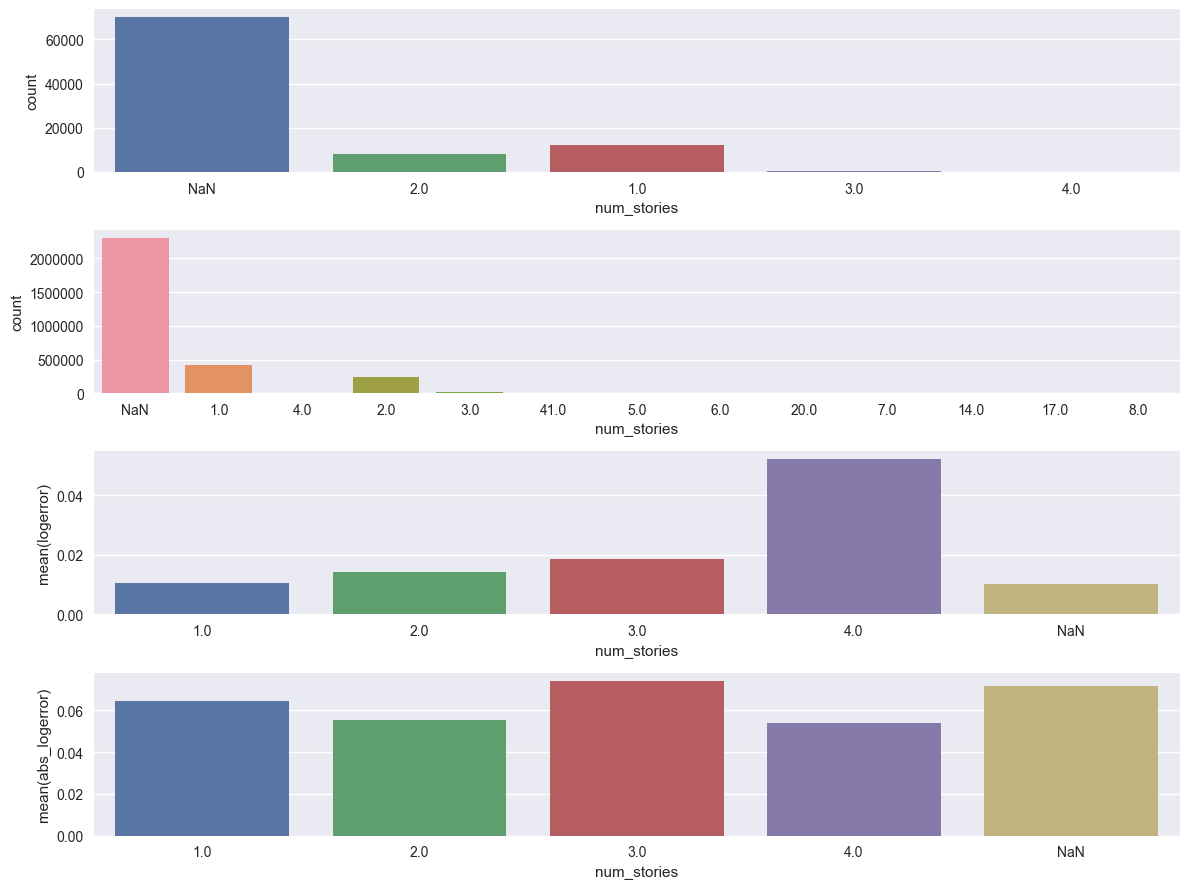

In [118]:
feature = 'num_stories'

fig  = plt.figure(figsize=(12, 9), dpi=100);
axes1 = fig.add_subplot(411); axes2 = fig.add_subplot(412); axes3 = fig.add_subplot(413); axes4 = fig.add_subplot(414); 
sns.countplot(train_df[feature].fillna('NaN'), ax=axes1); sns.countplot(sample_df[feature].fillna('NaN'),  ax=axes2);
bar_df1 = train_df[[feature,     "logerror"]].fillna('NaN').groupby([feature], as_index=False).mean()
bar_df2 = train_df[[feature, "abs_logerror"]].fillna('NaN').groupby([feature], as_index=False).mean()
sns.barplot(x=feature, y='logerror',     data=bar_df1, ax=axes3);
sns.barplot(x=feature, y='abs_logerror', data=bar_df2, ax=axes4);
fig.tight_layout()

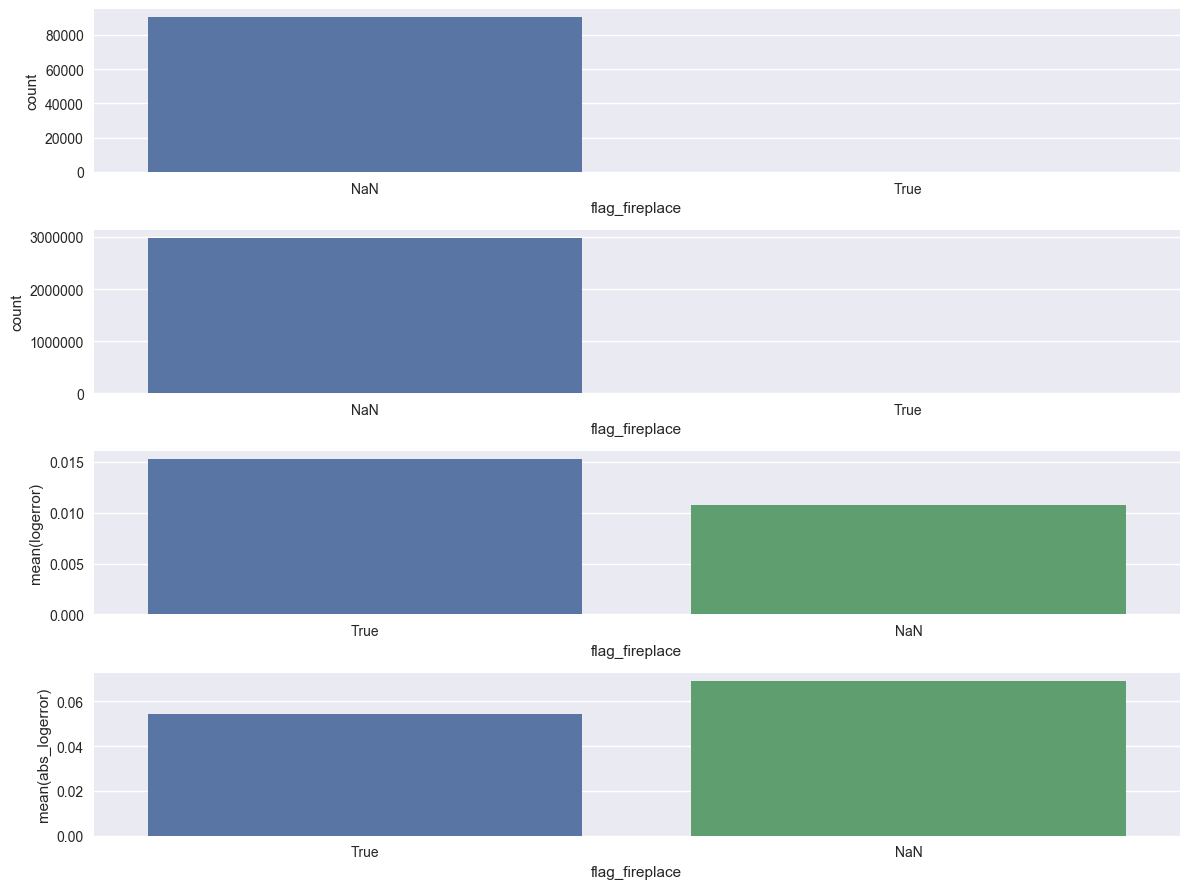

In [119]:
feature = 'flag_fireplace'

fig  = plt.figure(figsize=(12, 9), dpi=100);
axes1 = fig.add_subplot(411); axes2 = fig.add_subplot(412); axes3 = fig.add_subplot(413); axes4 = fig.add_subplot(414); 
sns.countplot(train_df[feature].fillna('NaN'), ax=axes1); sns.countplot(sample_df[feature].fillna('NaN'),  ax=axes2);
bar_df1 = train_df[[feature,     "logerror"]].fillna('NaN').groupby([feature], as_index=False).mean()
bar_df2 = train_df[[feature, "abs_logerror"]].fillna('NaN').groupby([feature], as_index=False).mean()
sns.barplot(x=feature, y='logerror',     data=bar_df1, ax=axes3);
sns.barplot(x=feature, y='abs_logerror', data=bar_df2, ax=axes4);
fig.tight_layout()

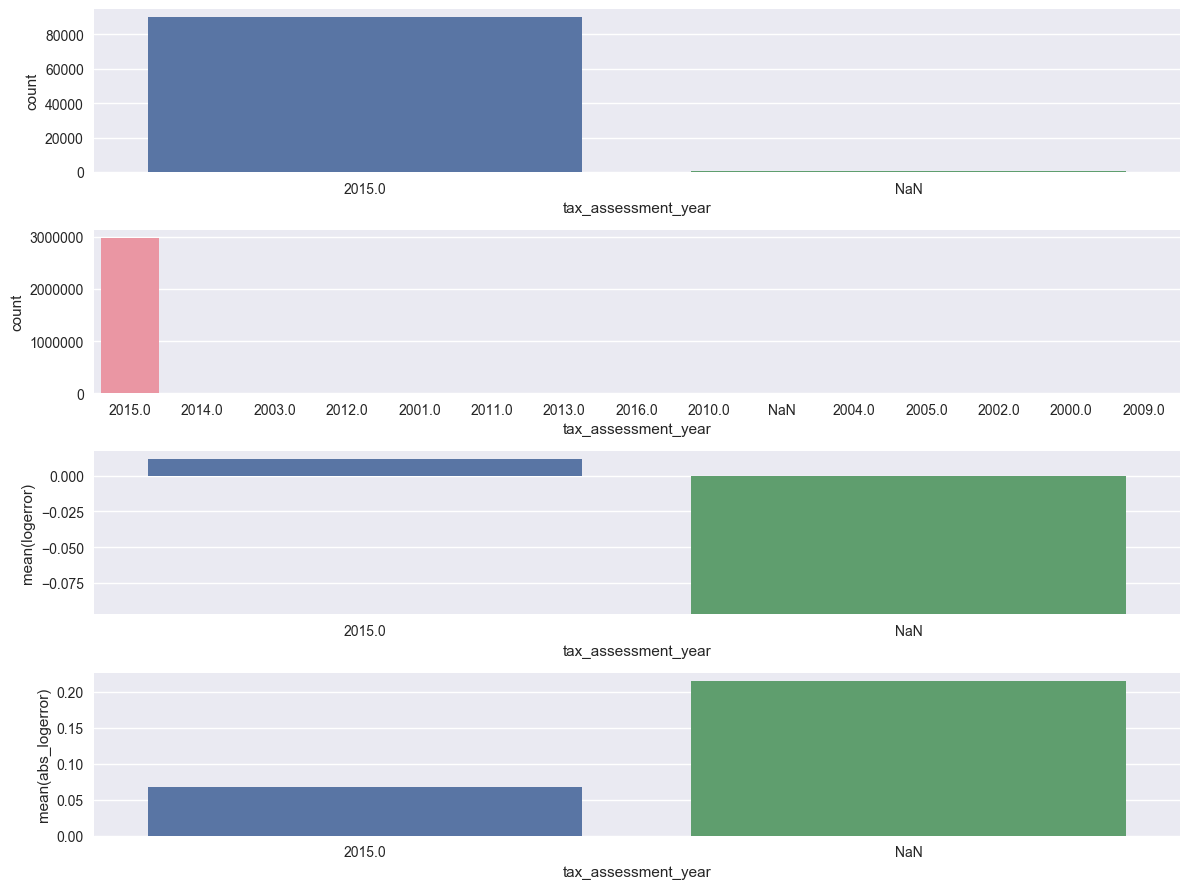

In [120]:
feature = 'tax_assessment_year'

fig  = plt.figure(figsize=(12, 9), dpi=100);
axes1 = fig.add_subplot(411); axes2 = fig.add_subplot(412); axes3 = fig.add_subplot(413); axes4 = fig.add_subplot(414); 
sns.countplot(train_df[feature].fillna('NaN'), ax=axes1); sns.countplot(sample_df[feature].fillna('NaN'),  ax=axes2);
bar_df1 = train_df[[feature,     "logerror"]].fillna('NaN').groupby([feature], as_index=False).mean()
bar_df2 = train_df[[feature, "abs_logerror"]].fillna('NaN').groupby([feature], as_index=False).mean()
sns.barplot(x=feature, y='logerror',     data=bar_df1, ax=axes3);
sns.barplot(x=feature, y='abs_logerror', data=bar_df2, ax=axes4);
fig.tight_layout()

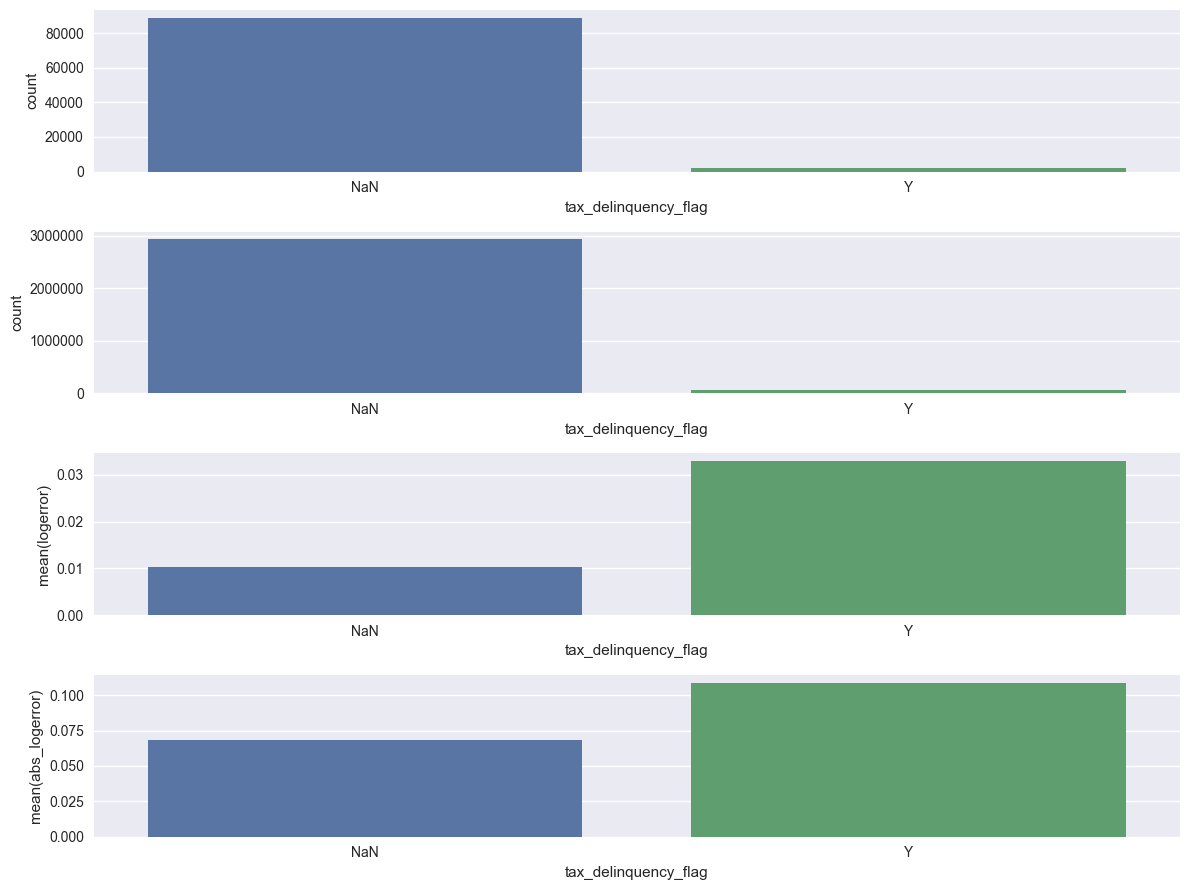

In [121]:
feature = 'tax_delinquency_flag'

fig  = plt.figure(figsize=(12, 9), dpi=100);
axes1 = fig.add_subplot(411); axes2 = fig.add_subplot(412); axes3 = fig.add_subplot(413); axes4 = fig.add_subplot(414); 
sns.countplot(train_df[feature].fillna('NaN'), ax=axes1); sns.countplot(sample_df[feature].fillna('NaN'),  ax=axes2);
bar_df1 = train_df[[feature,     "logerror"]].fillna('NaN').groupby([feature], as_index=False).mean()
bar_df2 = train_df[[feature, "abs_logerror"]].fillna('NaN').groupby([feature], as_index=False).mean()
sns.barplot(x=feature, y='logerror',     data=bar_df1, ax=axes3);
sns.barplot(x=feature, y='abs_logerror', data=bar_df2, ax=axes4);
fig.tight_layout()

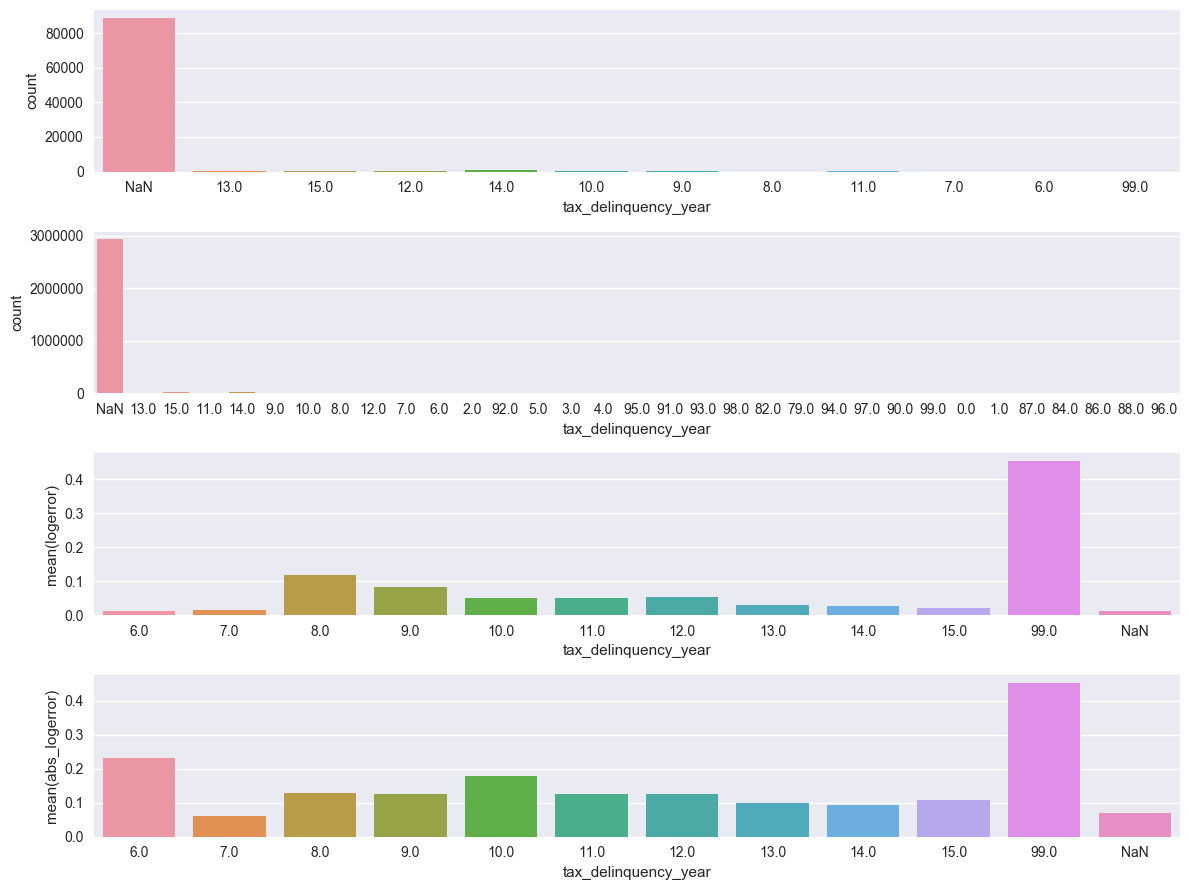

In [123]:
feature = 'tax_delinquency_year'

fig  = plt.figure(figsize=(12, 9), dpi=100);
axes1 = fig.add_subplot(411); axes2 = fig.add_subplot(412); axes3 = fig.add_subplot(413); axes4 = fig.add_subplot(414); 
sns.countplot(train_df[feature].fillna('NaN'), ax=axes1); sns.countplot(sample_df[feature].fillna('NaN'),  ax=axes2);
bar_df1 = train_df[[feature,     "logerror"]].fillna('NaN').groupby([feature], as_index=False).mean()
bar_df2 = train_df[[feature, "abs_logerror"]].fillna('NaN').groupby([feature], as_index=False).mean()
sns.barplot(x=feature, y='logerror',     data=bar_df1, ax=axes3);
sns.barplot(x=feature, y='abs_logerror', data=bar_df2, ax=axes4);
fig.tight_layout()

# Land Use Codes

Inspect land use code data. There are tons of codes, but very few of them occur with significant frequencies.

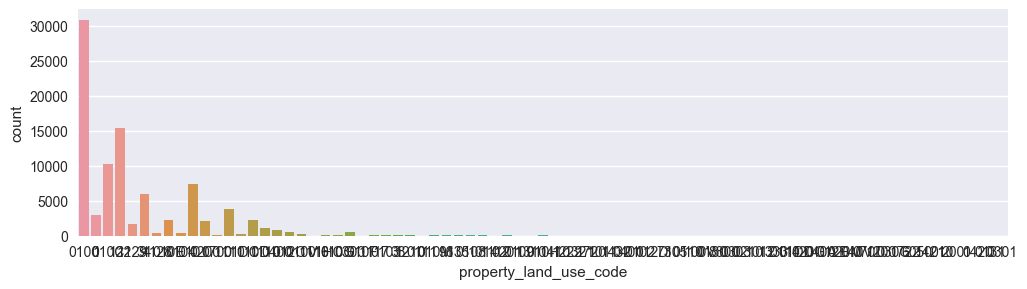

In [125]:
fig  = plt.figure(figsize=(12, 3), dpi=100);

axes1 = fig.add_subplot(111); 

sns.countplot(train_df['property_land_use_code'], ax=axes1);

#axes1.set_title("price_doc")
#axes2.set_title("Cross Validation")
#axes1.set_xlim(-0.5, 0.5)

In [127]:
train_df['property_land_use_code'].value_counts().reset_index().head()

,index,property_land_use_code
0,0100,30846
1,122,15383
2,010C,10264
3,0101,7435
4,34,5946


Remove codes that don't occur frequently.

In [129]:
land_use_code_counts = train_df['property_land_use_code'].value_counts().reset_index();

train_df['property_land_use_code'] = train_df['property_land_use_code'].replace(to_replace=land_use_code_counts[land_use_code_counts['property_land_use_code'] < 300]['index'].values, value='landuse_other')

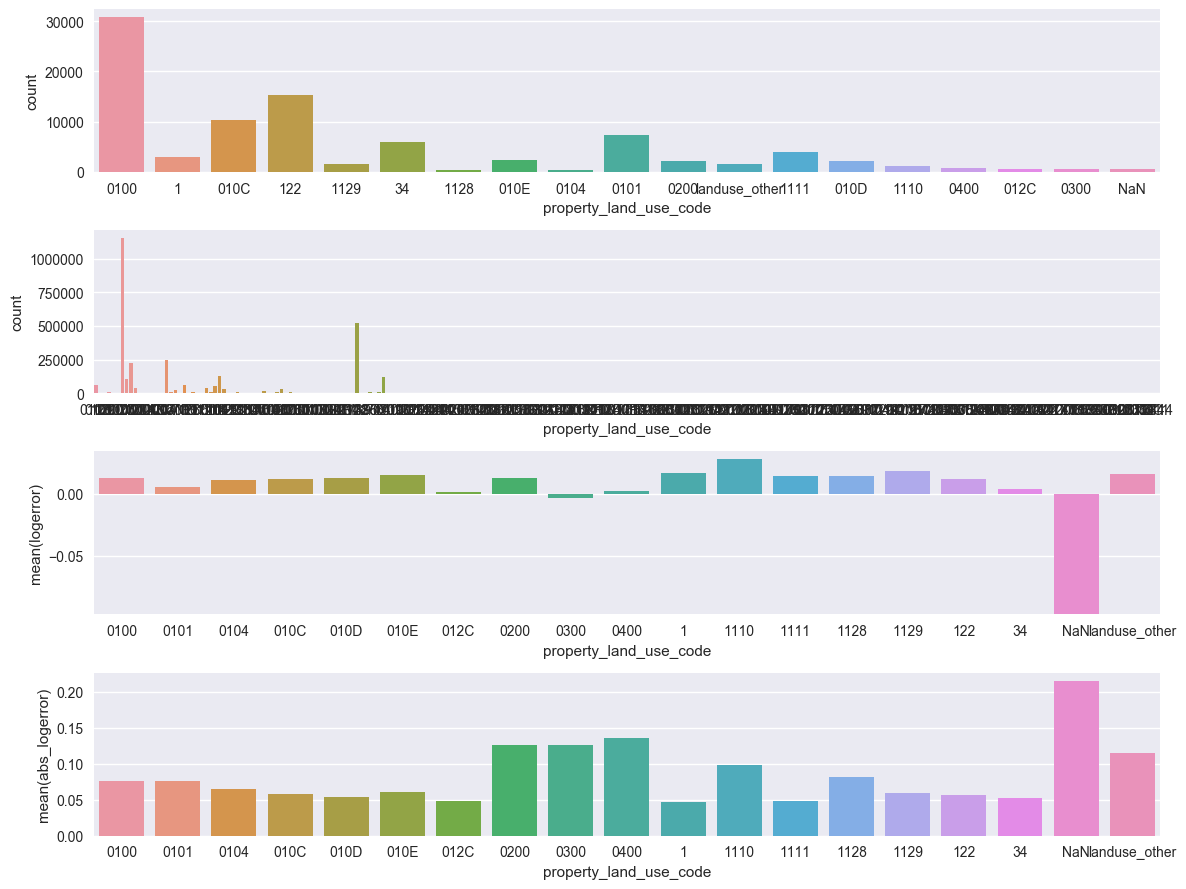

In [130]:
feature = 'property_land_use_code'

fig  = plt.figure(figsize=(12, 9), dpi=100);
axes1 = fig.add_subplot(411); axes2 = fig.add_subplot(412); axes3 = fig.add_subplot(413); axes4 = fig.add_subplot(414); 
sns.countplot(train_df[feature].fillna('NaN'), ax=axes1); sns.countplot(sample_df[feature].fillna('NaN'),  ax=axes2);
bar_df1 = train_df[[feature,     "logerror"]].fillna('NaN').groupby([feature], as_index=False).mean()
bar_df2 = train_df[[feature, "abs_logerror"]].fillna('NaN').groupby([feature], as_index=False).mean()
sns.barplot(x=feature, y='logerror',     data=bar_df1, ax=axes3);
sns.barplot(x=feature, y='abs_logerror', data=bar_df2, ax=axes4);
fig.tight_layout()

# Land Use Type

Same thing for land use types.

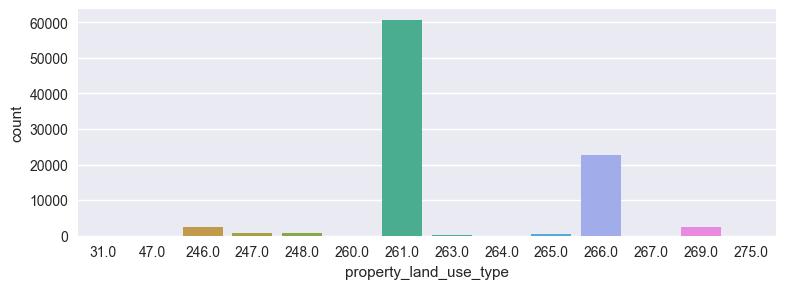

In [131]:
fig  = plt.figure(figsize=(9, 3), dpi=100);

axes1 = fig.add_subplot(111); 

sns.countplot(train_df['property_land_use_type'], ax=axes1);

#axes1.set_title("price_doc")
#axes2.set_title("Cross Validation")
#axes1.set_xlim(-0.5, 0.5)

In [132]:
train_df['property_land_use_type'].value_counts().reset_index().head()

,index,property_land_use_type
0,261.0,60637
1,266.0,22815
2,246.0,2376
3,269.0,2334
4,248.0,879


In [134]:
land_use_type_counts = train_df['property_land_use_type'].value_counts().reset_index();

train_df['property_land_use_type'] = train_df['property_land_use_type'].replace(to_replace=land_use_type_counts[land_use_type_counts['property_land_use_type'] < 300]['index'].values, value='landuse_other')

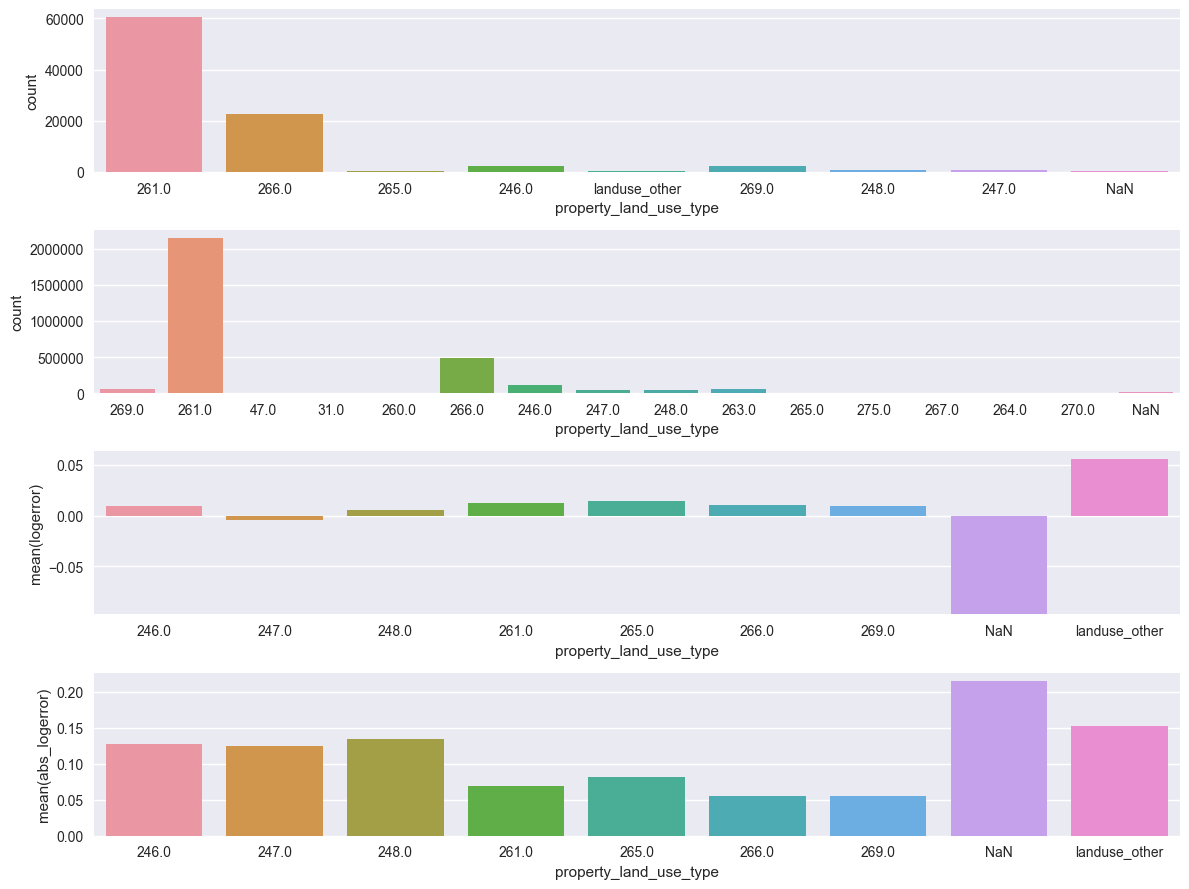

In [135]:
feature = 'property_land_use_type'

fig  = plt.figure(figsize=(12, 9), dpi=100);
axes1 = fig.add_subplot(411); axes2 = fig.add_subplot(412); axes3 = fig.add_subplot(413); axes4 = fig.add_subplot(414); 
sns.countplot(train_df[feature].fillna('NaN'), ax=axes1); sns.countplot(sample_df[feature].fillna('NaN'),  ax=axes2);
bar_df1 = train_df[[feature,     "logerror"]].fillna('NaN').groupby([feature], as_index=False).mean()
bar_df2 = train_df[[feature, "abs_logerror"]].fillna('NaN').groupby([feature], as_index=False).mean()
sns.barplot(x=feature, y='logerror',     data=bar_df1, ax=axes3);
sns.barplot(x=feature, y='abs_logerror', data=bar_df2, ax=axes4);
fig.tight_layout()

## Property Zoning Description

...and property zoning descriptions

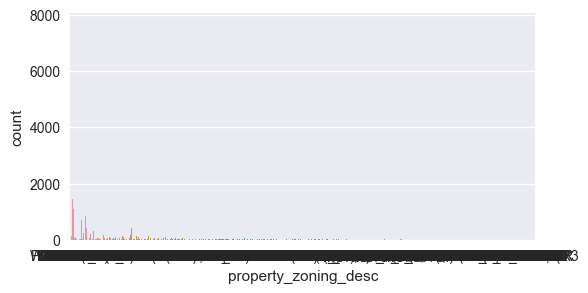

In [136]:
fig  = plt.figure(figsize=(6, 3), dpi=100);

axes1 = fig.add_subplot(111); 

sns.countplot(train_df['property_zoning_desc'], ax=axes1);

#axes1.set_title("price_doc")
#axes2.set_title("Cross Validation")
#axes1.set_xlim(-0.5, 0.5)

In [137]:
train_df['property_zoning_desc'].value_counts().reset_index().head()

,index,property_zoning_desc
0,LAR1,7678
1,LAR3,2801
2,LARS,1503
3,LBR1N,1459
4,LARD1.5,1305


In [138]:
zoning_counts = train_df['property_zoning_desc'].value_counts().reset_index();

#print(zoning_counts[zoning_counts['propertyzoningdesc'] > 5000].head())

train_df['property_zoning_desc'] = train_df['property_zoning_desc'].replace(to_replace=zoning_counts[zoning_counts['property_zoning_desc'] < 300]['index'].values, value='zone_other')

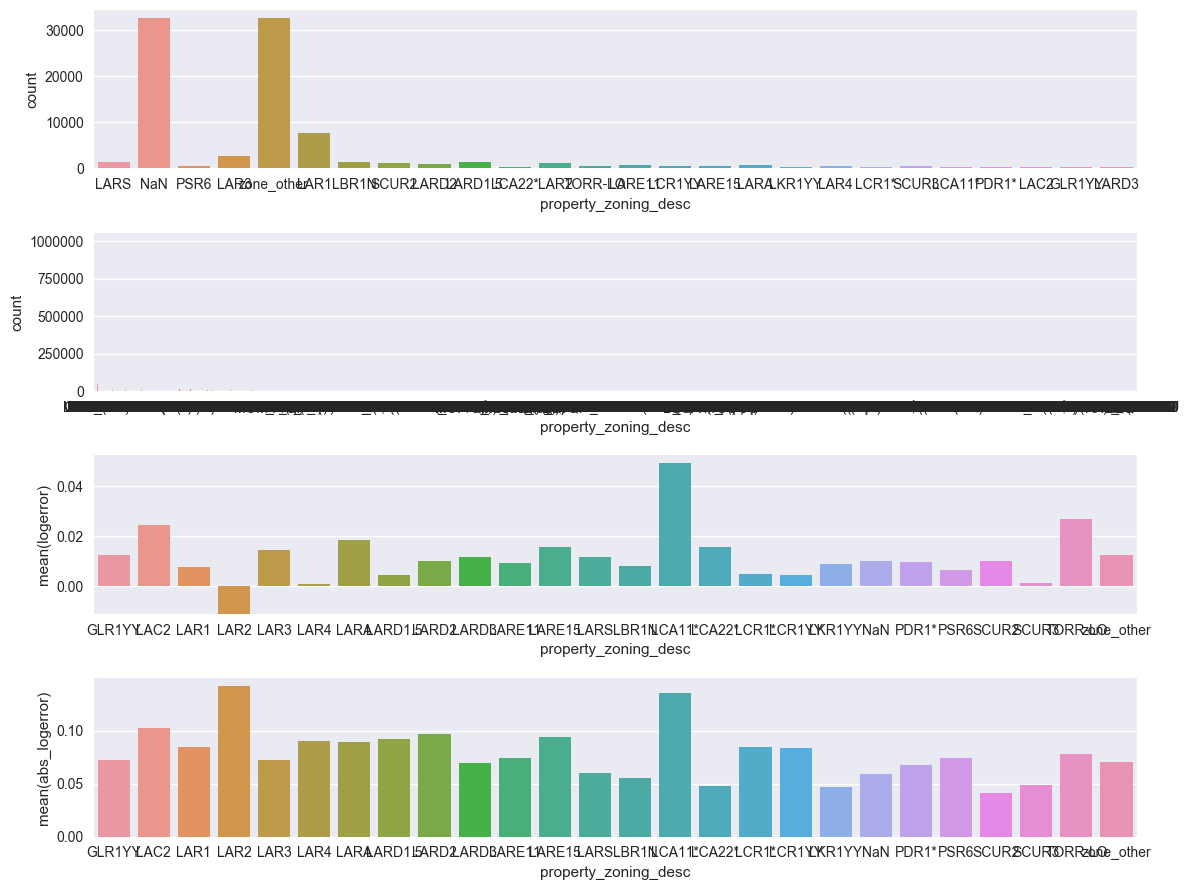

In [139]:
feature = 'property_zoning_desc'

fig  = plt.figure(figsize=(12, 9), dpi=100);
axes1 = fig.add_subplot(411); axes2 = fig.add_subplot(412); axes3 = fig.add_subplot(413); axes4 = fig.add_subplot(414); 
sns.countplot(train_df[feature].fillna('NaN'), ax=axes1); sns.countplot(sample_df[feature].fillna('NaN'),  ax=axes2);
bar_df1 = train_df[[feature,     "logerror"]].fillna('NaN').groupby([feature], as_index=False).mean()
bar_df2 = train_df[[feature, "abs_logerror"]].fillna('NaN').groupby([feature], as_index=False).mean()
sns.barplot(x=feature, y='logerror',     data=bar_df1, ax=axes3);
sns.barplot(x=feature, y='abs_logerror', data=bar_df2, ax=axes4);
fig.tight_layout()

Out of curiosity, look at correlation maps. The NaN zones have substantial correlation to other zones, indicating that data may be reasonably imputed.

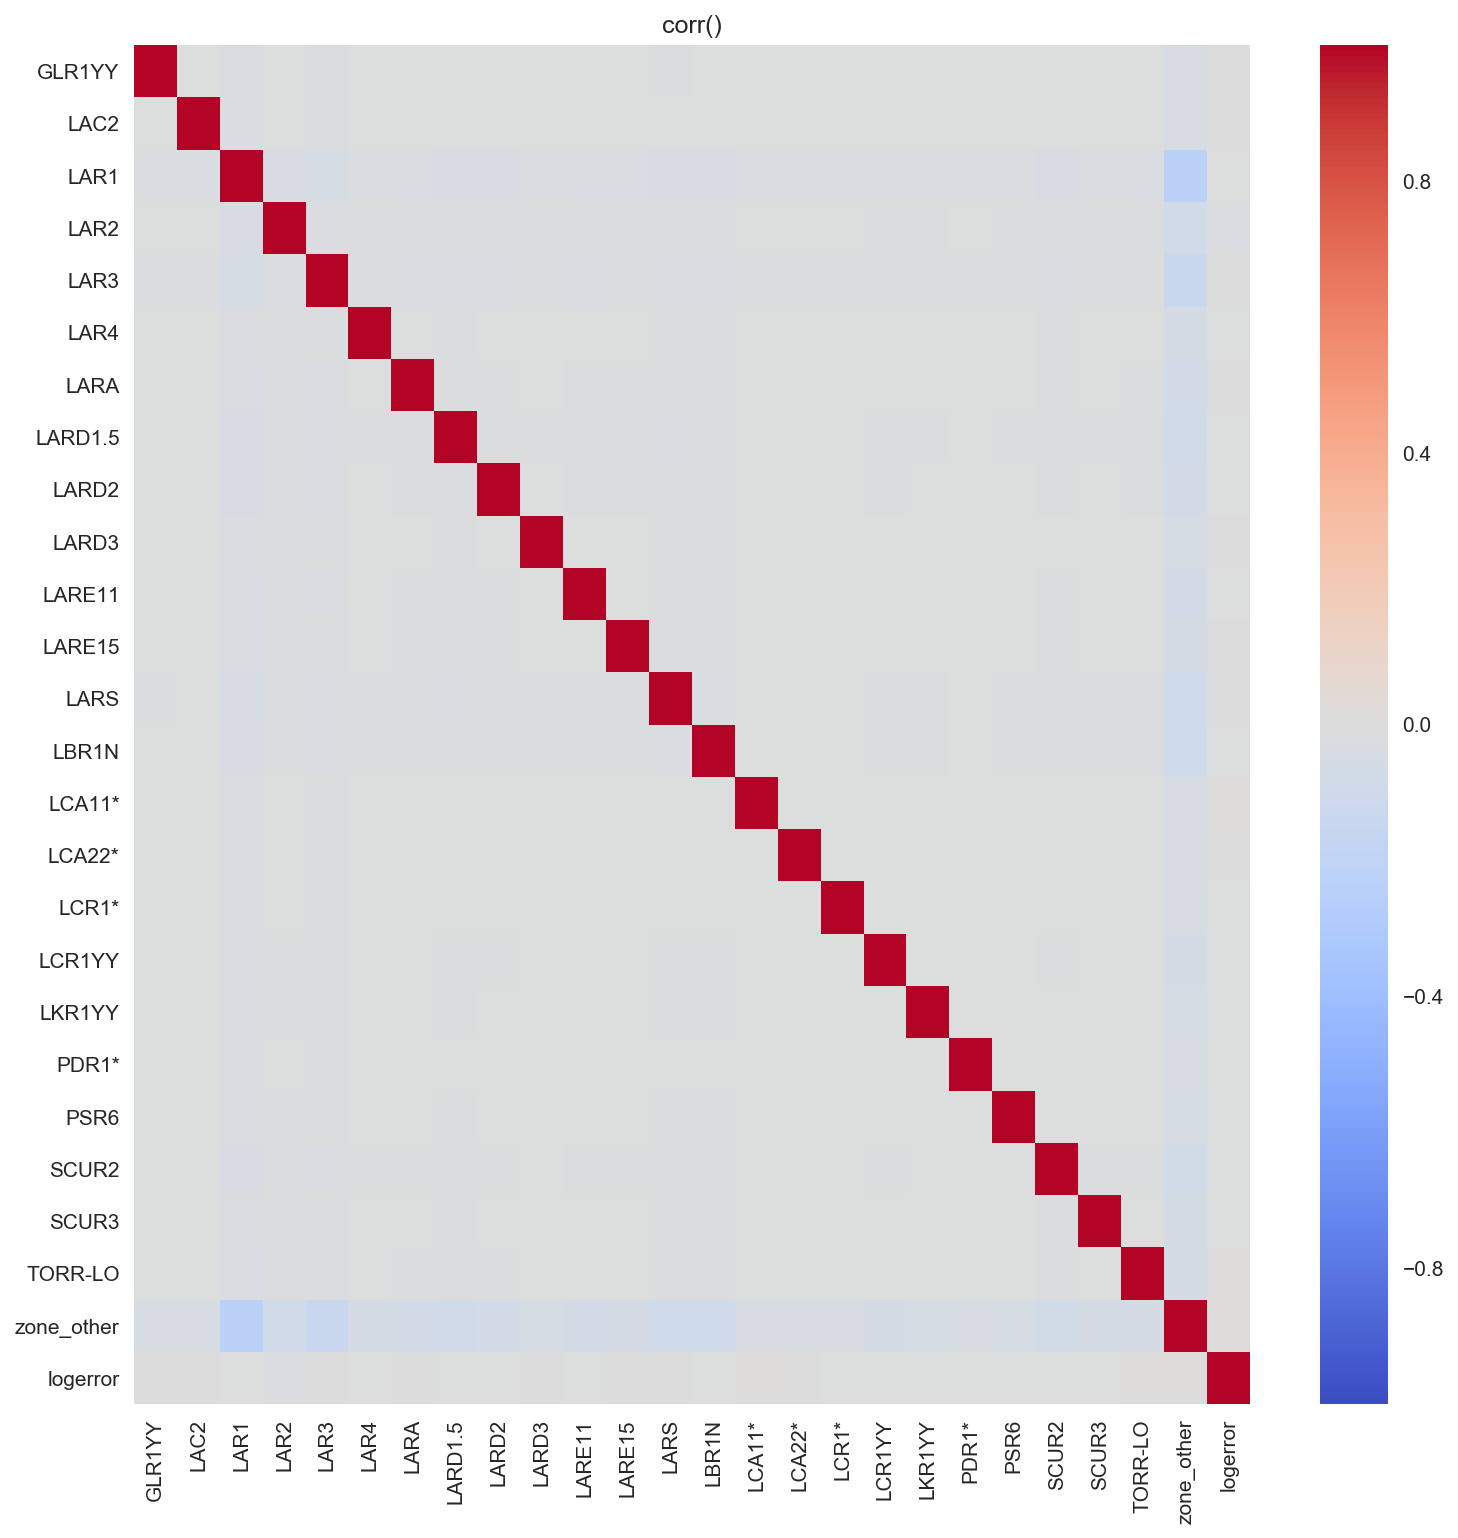

In [85]:
train_zoning = pd.get_dummies(train_df.property_zoning_desc)

train_zoning['logerror'] = train_df['logerror']

fig  = plt.figure(figsize=(12, 12), dpi=150);
axes1 = fig.add_subplot(111); 
sns.heatmap(train_zoning.corr(), ax=axes1, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('corr()')

To be continued...